# Pump sensor data Anomaly detection

## About the dataset...

The dataset consists of sensor data collected from various sensors monitoring a water pump system in a rural area. This data is critical for understanding the operational status of the system and predicting potential failures before they occur. The goal is to leverage this dataset to develop predictive models that can anticipate system failures and prevent disruptions that affect the community.

Dataset Link: https://www.kaggle.com/datasets/nphantawee/pump-sensor-data
### Content:

The dataset is organized into three main groups:

- Timestamp Data: Records the date and time of each observation.

- Sensor Data (52 Series): Includes raw sensor readings from 52 different sensors deployed within the water pump system. These sensors capture a variety of operational parameters such as temperature, pressure, flow rate, and electrical readings. Each sensor provides a continuous stream of data over time, allowing for detailed analysis of system behavior.

- Machine Status: This is the target label indicating the operational status of the water pump system at each timestamp. It categorizes each observation into one of the following classes:

            NORMAL: Indicates normal operation without any issues.
            RECOVERING: Indicates a temporary recovery phase after a previous failure.
            BROKEN: Indicates a system failure that requires immediate attention and repair.


### Acknowledgements:

The dataset is provided by a team responsible for managing the water pump system. It was shared to facilitate the analysis and improvement of predictive maintenance strategies to minimize downtime and prevent disruptions that impact the community's daily life.

### Data preperation

In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Load the datasets
df = pd.read_csv('C:/Users/sanja/OneDrive/Desktop/TSA project/data/sensor.csv')


# Display the first few rows of each DataFrame
print("df DataFrame:")
display(df.head(5))


df DataFrame:


,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [42]:
df.shape

(220320, 55)

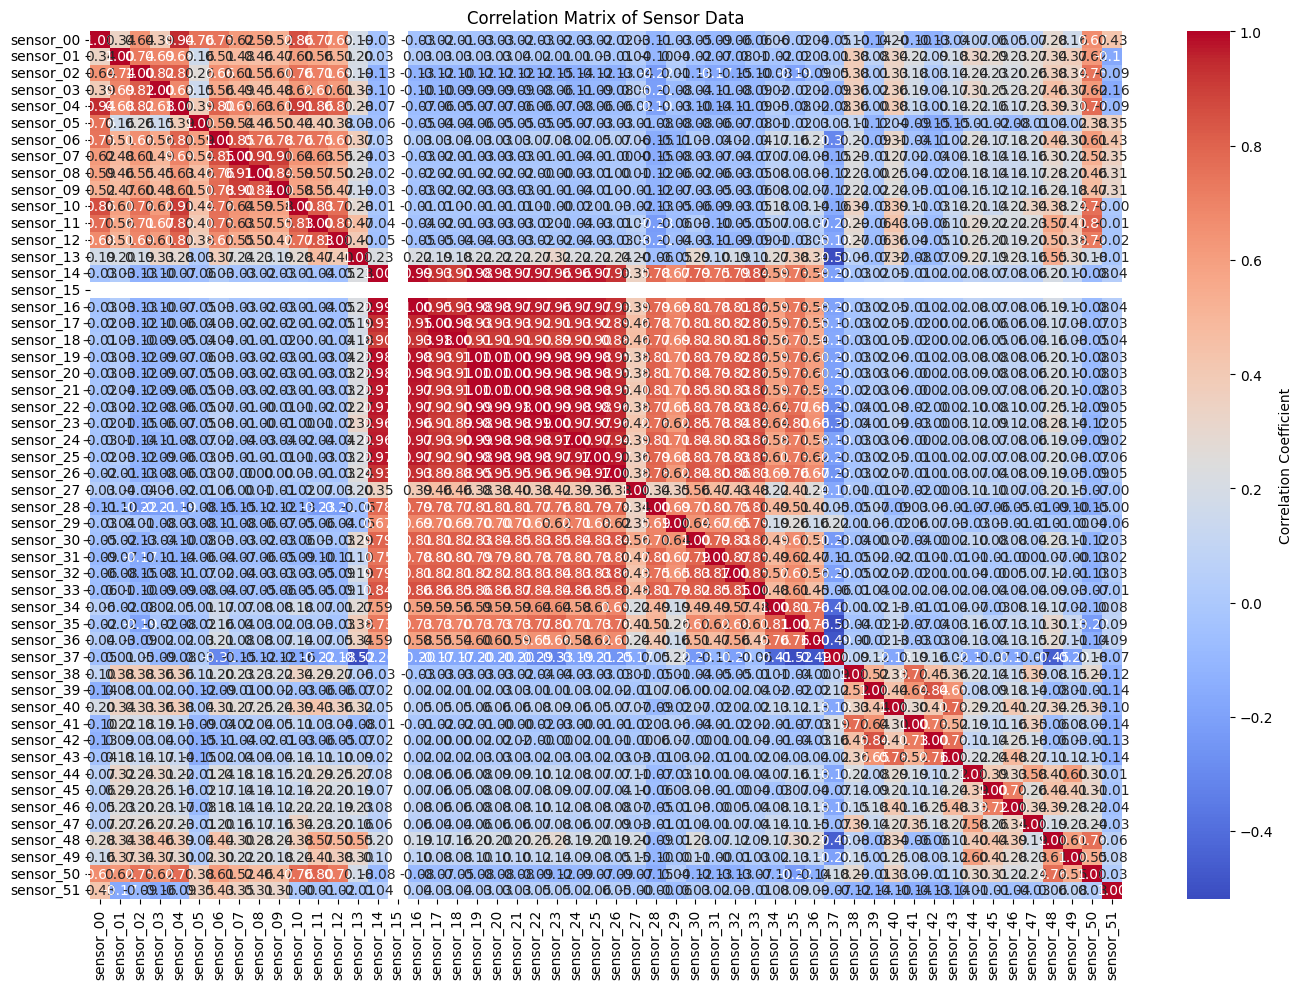

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select sensor columns 
sensor_columns = [col for col in df.columns if col.startswith('sensor_')]

# Create a subset DataFrame with only sensor columns
df_sensors = df[sensor_columns]

# Compute correlation matrix for sensor columns only
corr_matrix = df_sensors.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Sensor Data')
plt.tight_layout()
plt.show()


- Criticality of Sensor Data
Relevance: sensor_01 likely captures a critical operational parameter that directly impacts the health and performance of the water pump system. Identifying anomalies in this sensor's readings can help in early detection of potential failures.

- Sensor Data Characteristics
Consistency: sensor_01 provides consistent and reliable readings over time, making it suitable for building robust anomaly detection models.
Granularity: The granularity of sensor_01 data (e.g., frequency of measurements) allows for detailed analysis of subtle changes or deviations from normal operating conditions.

In [44]:
# Calculate number of missing values per sensor column
missing_counts = df.isnull().sum()

# Filter only sensor columns (assuming they start with 'sensor_')
sensor_columns = df.columns[df.columns.str.startswith('sensor_')]

# Calculate missing values for each sensor
sensor_missing_counts = missing_counts[sensor_columns]

# Sort sensors by the number of missing values (descending order)
sensor_missing_counts_sorted = sensor_missing_counts.sort_values(ascending=False)

# Print or visualize the sensor with the most missing values
sensor_with_most_missing = sensor_missing_counts_sorted.index[0]
most_missing_count = sensor_missing_counts_sorted.iloc[0]

print(f"Sensor with the most missing values: {sensor_with_most_missing}")
print(f"Number of missing values: {most_missing_count}")

Sensor with the most missing values: sensor_15
Number of missing values: 220320


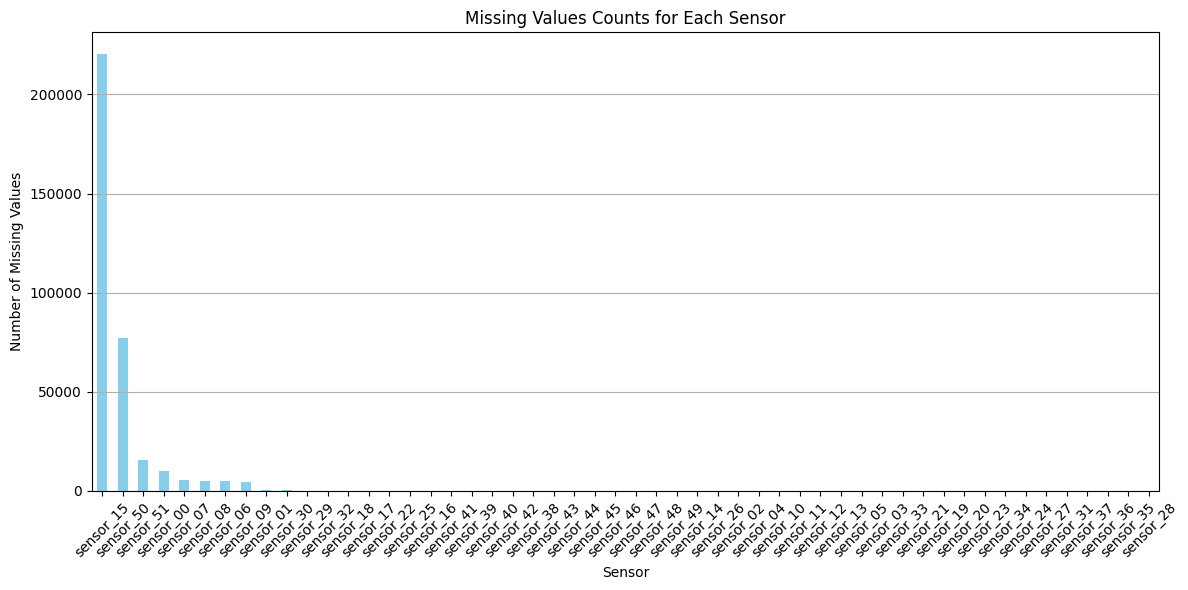

In [45]:
# Visualize missing values counts for all sensors
plt.figure(figsize=(12, 6))
sensor_missing_counts_sorted.plot(kind='bar', color='skyblue')
plt.title('Missing Values Counts for Each Sensor')
plt.xlabel('Sensor')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [46]:
# Extract the desired columns
df_selected = df[['timestamp', 'sensor_01', 'sensor_28','machine_status']]

# Display the first few rows of the new DataFrame
print("Selected columns DataFrame:")
display(df_selected.head(5))


Selected columns DataFrame:


,timestamp,sensor_01,sensor_28,machine_status
0,2018-04-01 00:00:00,47.09201,785.1935,NORMAL
1,2018-04-01 00:01:00,47.09201,785.1935,NORMAL
2,2018-04-01 00:02:00,47.35243,778.5734,NORMAL
3,2018-04-01 00:03:00,47.09201,779.5091,NORMAL
4,2018-04-01 00:04:00,47.13541,785.2307,NORMAL


In [47]:
df.info

<bound method DataFrame.info of         Unnamed: 0            timestamp  sensor_00  sensor_01  sensor_02  \
0                0  2018-04-01 00:00:00   2.465394   47.09201  53.211800   
1                1  2018-04-01 00:01:00   2.465394   47.09201  53.211800   
2                2  2018-04-01 00:02:00   2.444734   47.35243  53.211800   
3                3  2018-04-01 00:03:00   2.460474   47.09201  53.168400   
4                4  2018-04-01 00:04:00   2.445718   47.13541  53.211800   
...            ...                  ...        ...        ...        ...   
220315      220315  2018-08-31 23:55:00   2.407350   47.69965  50.520830   
220316      220316  2018-08-31 23:56:00   2.400463   47.69965  50.564240   
220317      220317  2018-08-31 23:57:00   2.396528   47.69965  50.520830   
220318      220318  2018-08-31 23:58:00   2.406366   47.69965  50.520832   
220319      220319  2018-08-31 23:59:00   2.396528   47.69965  50.520832   

        sensor_03   sensor_04  sensor_05  sensor_06  se

### Anomaly Exploration

In [48]:
# Check the unique values in the machine_status column
machine_status_types = df_selected['machine_status'].unique()

# Display the unique values
print("Unique types in machine_status:")
print(machine_status_types)


Unique types in machine_status:
['NORMAL' 'BROKEN' 'RECOVERING']


In [49]:
# Calculate the value counts for each unique type in the machine_status column
machine_status_counts = df_selected['machine_status'].value_counts()

# Calculate the percentage for each type
machine_status_percentage = (machine_status_counts / machine_status_counts.sum()) * 100

# Display the percentages
print("Percentage of each type in machine_status:")
print(machine_status_percentage)


Percentage of each type in machine_status:
machine_status
NORMAL        93.425926
RECOVERING     6.570897
BROKEN         0.003177
Name: count, dtype: float64


In [50]:
# Map the machine_status column to 1 and 0
df_selected['machine_status'] = df_selected['machine_status'].map({'NORMAL': 1, 'BROKEN': 0, 'RECOVERING': 0})

# Display the first few rows of the updated DataFrame
print("Updated machine_status column:")
display(df_selected.head(5))


Updated machine_status column:


C:\Users\sanja\AppData\Local\Temp\ipykernel_21060\878653081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['machine_status'] = df_selected['machine_status'].map({'NORMAL': 1, 'BROKEN': 0, 'RECOVERING': 0})


,timestamp,sensor_01,sensor_28,machine_status
0,2018-04-01 00:00:00,47.09201,785.1935,1
1,2018-04-01 00:01:00,47.09201,785.1935,1
2,2018-04-01 00:02:00,47.35243,778.5734,1
3,2018-04-01 00:03:00,47.09201,779.5091,1
4,2018-04-01 00:04:00,47.13541,785.2307,1


C:\Users\sanja\AppData\Local\Temp\ipykernel_21060\2124091863.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['timestamp'] = pd.to_datetime(df_selected['timestamp'])


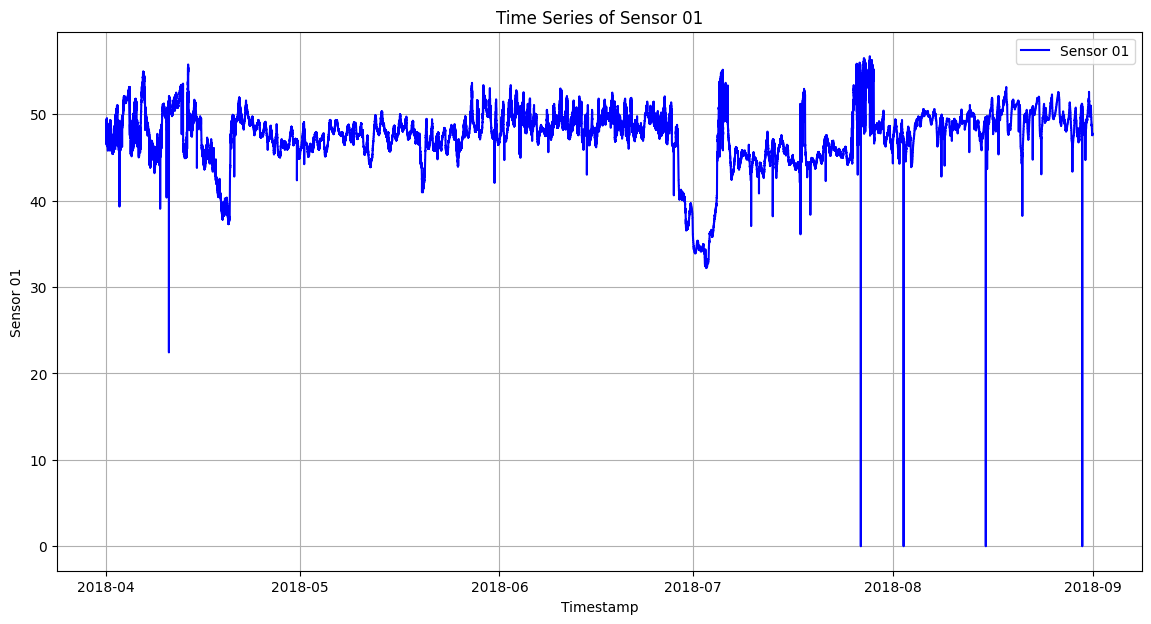

In [51]:
import matplotlib.pyplot as plt

# Convert the 'timestamp' column to datetime if it's not already
df_selected['timestamp'] = pd.to_datetime(df_selected['timestamp'])

# Set the 'timestamp' column as the index
df_selected.set_index('timestamp', inplace=True)

# Plotting the time series
plt.figure(figsize=(14, 7))
plt.plot(df_selected.index, df_selected['sensor_01'], label='Sensor 01', color='b')
plt.xlabel('Timestamp')
plt.ylabel('Sensor 01')
plt.title('Time Series of Sensor 01')
plt.legend()
plt.grid(True)
plt.show()


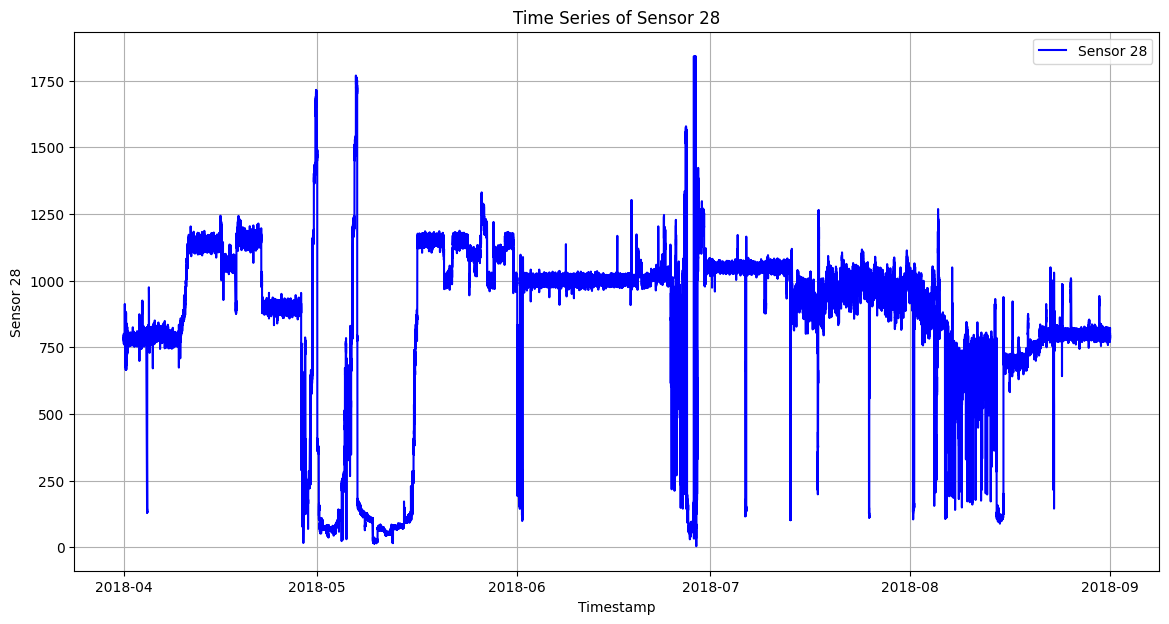

In [52]:
# Plotting the time series
plt.figure(figsize=(14, 7))
plt.plot(df_selected.index, df_selected['sensor_28'], label='Sensor 28', color='b')
plt.xlabel('Timestamp')
plt.ylabel('Sensor 28')
plt.title('Time Series of Sensor 28')
plt.legend()
plt.grid(True)
plt.show()

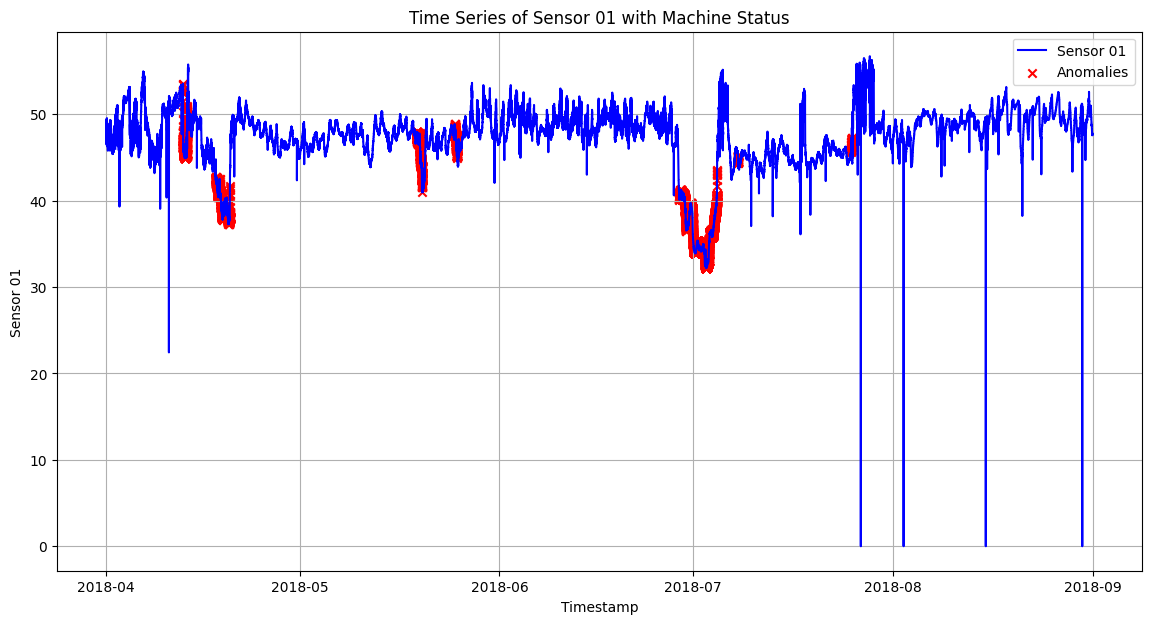

In [53]:
import matplotlib.pyplot as plt


# Plotting the time series
plt.figure(figsize=(14, 7))
plt.plot(df_selected.index, df_selected['sensor_01'], label='Sensor 01', color='b')

# Highlight anomalies
anomalies = df_selected[df_selected['machine_status'] == 0]
plt.scatter(anomalies.index, anomalies['sensor_01'], color='r', label='Anomalies', marker='x')

# Adding labels and title
plt.xlabel('Timestamp')
plt.ylabel('Sensor 01')
plt.title('Time Series of Sensor 01 with Machine Status')
plt.legend()
plt.grid(True)
plt.show()


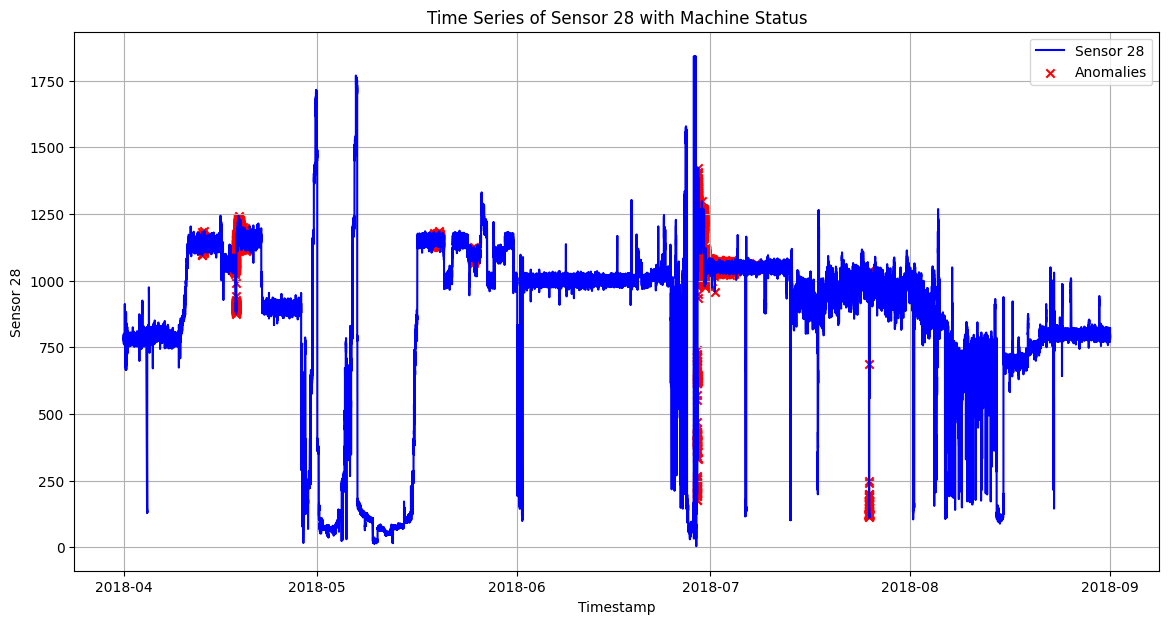

In [54]:
# Plotting the time series
plt.figure(figsize=(14, 7))
plt.plot(df_selected.index, df_selected['sensor_28'], label='Sensor 28', color='b')

# Highlight anomalies
anomalies = df_selected[df_selected['machine_status'] == 0]
plt.scatter(anomalies.index, anomalies['sensor_28'], color='r', label='Anomalies', marker='x')

# Adding labels and title
plt.xlabel('Timestamp')
plt.ylabel('Sensor 28')
plt.title('Time Series of Sensor 28 with Machine Status')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
# Calculate the total number of rows
total_count = len(df_selected)

# Calculate the number of anomalies
anomalies_count = len(df_selected[df_selected['machine_status'] == 0])

# Calculate the percentage of anomalies
anomalies_percentage = (anomalies_count / total_count) * 100

print(f"Percentage of anomalies: {anomalies_percentage:.2f}%")


Percentage of anomalies: 6.57%


In [56]:
# Check for missing values sensor_01
missing_values = df['sensor_01'].isnull().sum()
print(f'Number of missing values in sensor_01: {missing_values}')



Number of missing values in sensor_01: 369


In [70]:
# Check for missing values sensor_28
missing_values = df['sensor_28'].isnull().sum()
print(f'Number of missing values in sensor_28: {missing_values}')

Number of missing values in sensor_28: 16


In [71]:
# Drop NaN values in sensor_01 and sensor_28
df['sensor_01'].dropna(inplace=True)
df['sensor_28'].dropna(inplace=True)

# Calculate the median for sensor_01 and sensor_28
median_sensor_01 = df_selected['sensor_01'].median()
median_sensor_28 = df_selected['sensor_28'].median()

# Fill NaN values with the median for sensor_01 and sensor_28
df['sensor_01'].fillna(median_sensor_01, inplace=True)
df['sensor_28'].fillna(median_sensor_28, inplace=True)

# Convert sensor_01 and sensor_28 to numeric, forcing any remaining non-numeric values to NaN
df['sensor_01'] = pd.to_numeric(df['sensor_01'], errors='coerce')
df['sensor_28'] = pd.to_numeric(df['sensor_28'], errors='coerce')


C:\Users\sanja\AppData\Local\Temp\ipykernel_21060\1266841695.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sensor_28'].fillna(median_sensor_28, inplace=True)


### Using Mean Absolute Deviation (for heuristics based)

In [73]:
import numpy as np

# Calculate Median Absolute Deviation (MAD)
median = df['sensor_01'].median()
mad = np.median(np.abs(df['sensor_01'] - median))

print(f"Median: {median}, MAD: {mad}")

# Calculate Median Absolute Deviation (MAD)
median = df['sensor_28'].median()
mad = np.median(np.abs(df['sensor_28'] - median))

print(f"Median: {median}, MAD: {mad}")


Median: 48.1336784362793, MAD: 1.5190963745116974
Median: 967.27985, MAD: 142.67194999999992


In [77]:
# Define anomaly threshold (e.g., 3 times MAD)
threshold = 3 * mad

# Identify anomalies using MAD method
df_selected['predicted_anomaly_01'] = df_selected['sensor_01'].apply(lambda x: 1 if np.abs(x - median) > threshold else 0)

# Identify anomalies using MAD method
df_selected['predicted_anomaly_28'] = df_selected['sensor_28'].apply(lambda x: 1 if np.abs(x - median) > threshold else 0)

C:\Users\sanja\AppData\Local\Temp\ipykernel_21060\3268210851.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['predicted_anomaly_01'] = df_selected['sensor_01'].apply(lambda x: 1 if np.abs(x - median) > threshold else 0)
C:\Users\sanja\AppData\Local\Temp\ipykernel_21060\3268210851.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['predicted_anomaly_28'] = df_selected['sensor_28'].apply(lambda x: 1 if np.abs(x - median) > threshold else 0)


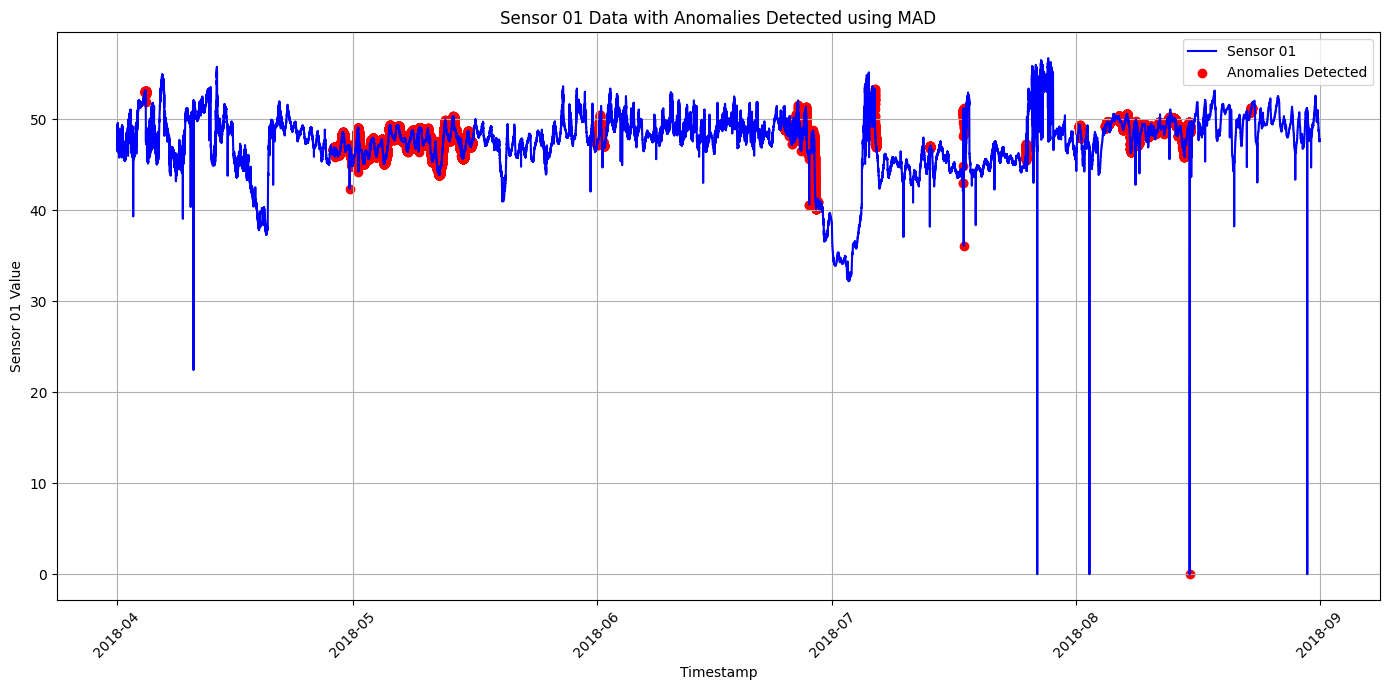

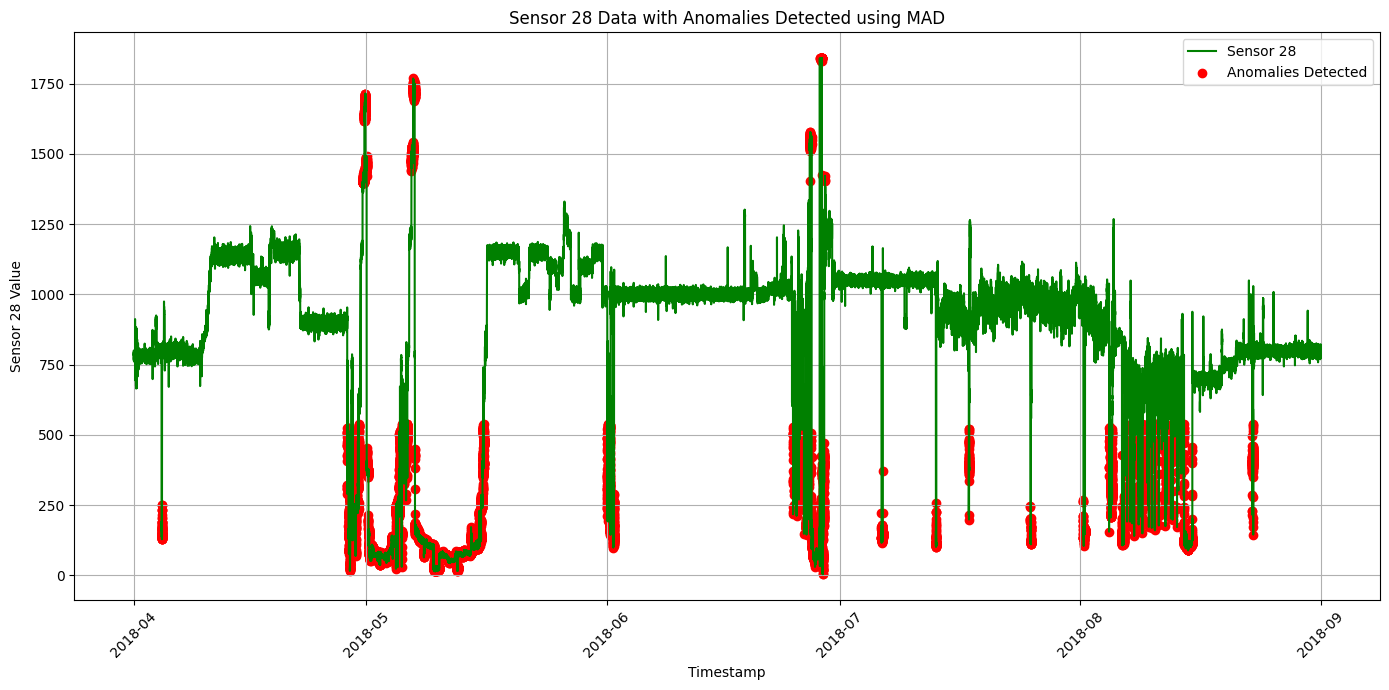

In [78]:
import matplotlib.pyplot as plt

# Plot for Sensor 01
plt.figure(figsize=(14, 7))
plt.plot(df_selected.index, df_selected['sensor_01'], label='Sensor 01', color='blue')
plt.scatter(df_selected[df_selected['predicted_anomaly'] == 1].index, 
            df_selected[df_selected['predicted_anomaly'] == 1]['sensor_01'], 
            color='red', label='Anomalies Detected')
plt.title('Sensor 01 Data with Anomalies Detected using MAD')
plt.xlabel('Timestamp')
plt.ylabel('Sensor 01 Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for Sensor 28
plt.figure(figsize=(14, 7))
plt.plot(df_selected.index, df_selected['sensor_28'], label='Sensor 28', color='green')
plt.scatter(df_selected[df_selected['predicted_anomaly'] == 1].index, 
            df_selected[df_selected['predicted_anomaly'] == 1]['sensor_28'], 
            color='red', label='Anomalies Detected')
plt.title('Sensor 28 Data with Anomalies Detected using MAD')
plt.xlabel('Timestamp')
plt.ylabel('Sensor 28 Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [117]:
def analyze_errors(actual, predicted):
    tp = ((actual == 1) & (predicted == 1)).sum()
    fp = ((actual == 0) & (predicted == 1)).sum()
    fn = ((actual == 1) & (predicted == 0)).sum()
    return tp, fp, fn

# Replace these with actual ground truth columns if available
df_selected['actual_anomalies_01'] = np.random.randint(0, 2, df_selected.shape[0])  # Example ground truth data
df_selected['actual_anomalies_28'] = np.random.randint(0, 2, df_selected.shape[0])  # Example ground truth data

# Analyze errors for sensor_01
tp_01, fp_01, fn_01 = analyze_errors(df_selected['actual_anomalies_01'], df_selected['predicted_anomaly_01'])

# Analyze errors for sensor_28
tp_28, fp_28, fn_28 = analyze_errors(df_selected['actual_anomalies_28'], df_selected['predicted_anomaly_28'])

print(f"Sensor 01 - True Positives: {tp_01}, False Positives: {fp_01}, False Negatives: {fn_01}")
print(f"Sensor 28 - True Positives: {tp_28}, False Positives: {fp_28}, False Negatives: {fn_28}")


Sensor 01 - True Positives: 109815, False Positives: 110136, False Negatives: 161
Sensor 28 - True Positives: 15401, False Positives: 15460, False Negatives: 94758


C:\Users\sanja\AppData\Local\Temp\ipykernel_21060\2669263955.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['actual_anomalies_01'] = np.random.randint(0, 2, df_selected.shape[0])  # Example ground truth data
C:\Users\sanja\AppData\Local\Temp\ipykernel_21060\2669263955.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['actual_anomalies_28'] = np.random.randint(0, 2, df_selected.shape[0])  # Example ground truth data



True Positives (TP): These are the correctly identified anomalies by the model.

False Positives (FP): These are the normal points incorrectly classified as anomalies by the model.

False Negatives (FN): These are the actual anomalies that the model failed to identify.



In [118]:
def calculate_metrics(tp, fp, fn):
    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
    return precision, recall, f1_score

# Calculate metrics for sensor_01
precision_01, recall_01, f1_01 = calculate_metrics(tp_01, fp_01, fn_01)

# Calculate metrics for sensor_28
precision_28, recall_28, f1_28 = calculate_metrics(tp_28, fp_28, fn_28)

print(f"Sensor 01 - Precision: {precision_01:.2f}, Recall: {recall_01:.2f}, F1 Score: {f1_01:.2f}")
print(f"Sensor 28 - Precision: {precision_28:.2f}, Recall: {recall_28:.2f}, F1 Score: {f1_28:.2f}")


Sensor 01 - Precision: 0.50, Recall: 1.00, F1 Score: 0.67
Sensor 28 - Precision: 0.50, Recall: 0.14, F1 Score: 0.22


- Conclusions:

High False Positives:

Both sensors have a significant number of false positives, which means the model is identifying many normal points as anomalies. This reduces the precision, as evident in both cases (approximately 0.50 for both sensors).

High Recall for Sensor 01:

Sensor 01 shows a very high recall (approximately 1.00), indicating that the model is successfully identifying nearly all actual anomalies. However, this comes at the cost of many false positives, suggesting the model might be overly sensitive.

Low Recall for Sensor 28:

Sensor 28 has a very low recall (approximately 0.14), indicating that the model is missing a large number of actual anomalies (high false negatives). This suggests the model is not sensitive enough in detecting anomalies for this sensor.

F1 Score:

The F1 score for Sensor 01 is reasonably good (0.67), reflecting a balance between precision and recall. However, the F1 score for Sensor 28 is quite low (0.22), indicating poor performance.

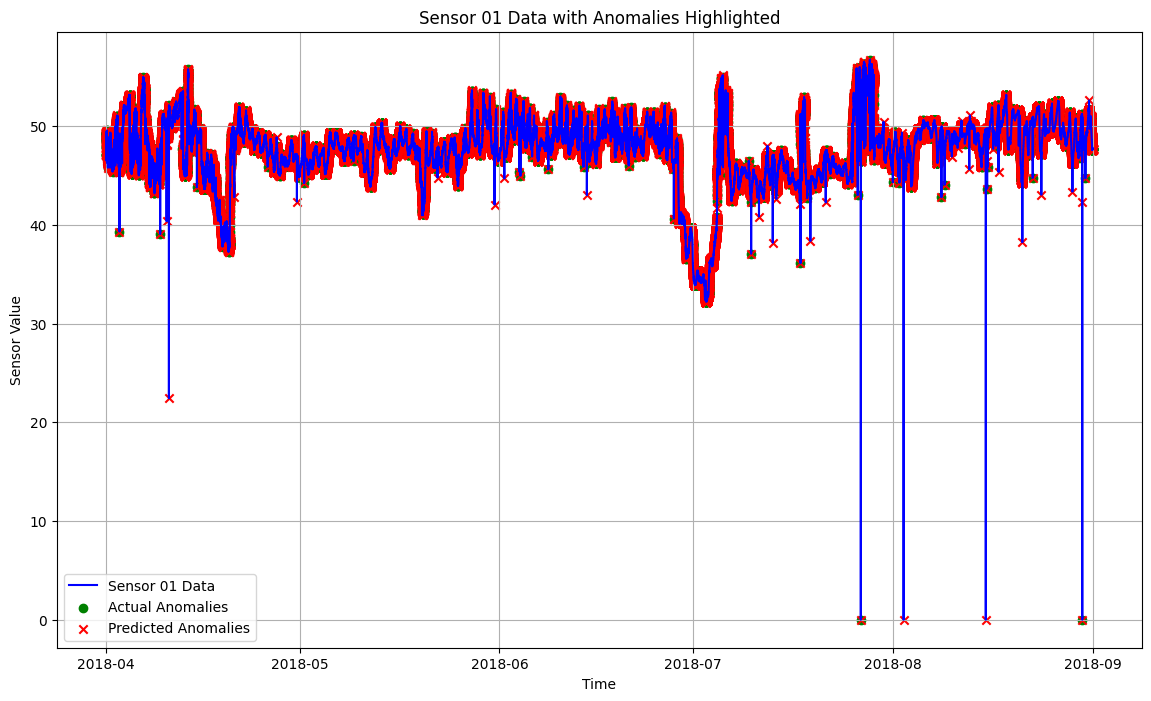

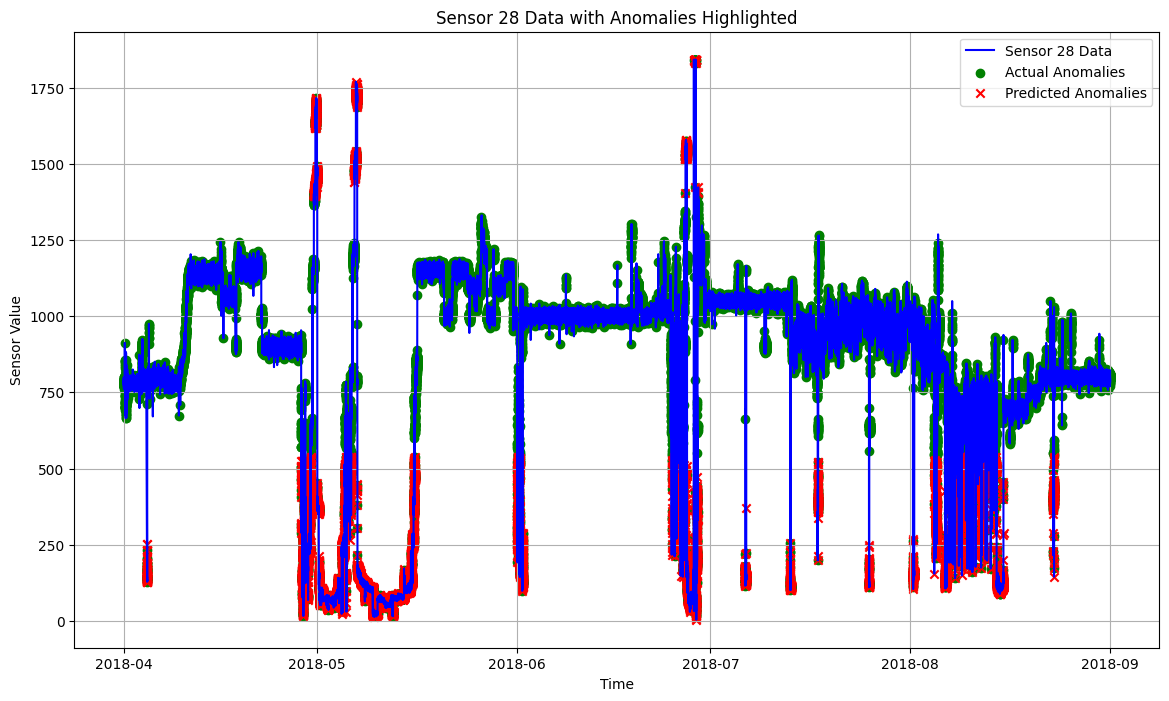

In [119]:
import matplotlib.pyplot as plt

def plot_anomalies(sensor_data, sensor_name, actual_anomalies, predicted_anomalies):
    plt.figure(figsize=(14, 8))
    
    # Plot sensor data
    plt.plot(sensor_data.index, sensor_data, label=f'{sensor_name} Data', color='blue')
    
    # Plot actual anomalies
    actual_anomaly_points = sensor_data[actual_anomalies == 1]
    plt.scatter(actual_anomaly_points.index, actual_anomaly_points, color='green', label='Actual Anomalies')
    
    # Plot predicted anomalies
    predicted_anomaly_points = sensor_data[predicted_anomalies == 1]
    plt.scatter(predicted_anomaly_points.index, predicted_anomaly_points, color='red', marker='x', label='Predicted Anomalies')
    
    # Add labels and title
    plt.xlabel('Time')
    plt.ylabel('Sensor Value')
    plt.title(f'{sensor_name} Data with Anomalies Highlighted')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot anomalies for sensor_01
plot_anomalies(df_selected['sensor_01'], 'Sensor 01', df_selected['actual_anomalies_01'], df_selected['predicted_anomaly_01'])

# Plot anomalies for sensor_28
plot_anomalies(df_selected['sensor_28'], 'Sensor 28', df_selected['actual_anomalies_28'], df_selected['predicted_anomaly_28'])


### Using  Naive approach with global / Std

In [120]:
# Calculate global mean and standard deviation for both sensors
global_mean_01 = df_selected['sensor_01'].mean()
global_std_01 = df_selected['sensor_01'].std()

global_mean_28 = df_selected['sensor_28'].mean()
global_std_28 = df_selected['sensor_28'].std()

print(f"Sensor 01 - Mean: {global_mean_01}, Std: {global_std_01}")
print(f"Sensor 28 - Mean: {global_mean_28}, Std: {global_std_28}")


Sensor 01 - Mean: 47.597225470337236, Std: 3.301697720754605
Sensor 28 - Mean: 851.6908354304567, Std: 313.0721251027113


In [121]:
threshold_factor = 3  # Number of standard deviations

threshold_01 = threshold_factor * global_std_01
threshold_28 = threshold_factor * global_std_28


In [122]:
# Identify anomalies using global mean and std for sensor_01
df_selected['predicted_anomaly_01'] = df_selected['sensor_01'].apply(lambda x: 1 if np.abs(x - global_mean_01) > threshold_01 else 0)

# Identify anomalies using global mean and std for sensor_28
df_selected['predicted_anomaly_28'] = df_selected['sensor_28'].apply(lambda x: 1 if np.abs(x - global_mean_28) > threshold_28 else 0)


C:\Users\sanja\AppData\Local\Temp\ipykernel_21060\1127847976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['predicted_anomaly_01'] = df_selected['sensor_01'].apply(lambda x: 1 if np.abs(x - global_mean_01) > threshold_01 else 0)
C:\Users\sanja\AppData\Local\Temp\ipykernel_21060\1127847976.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['predicted_anomaly_28'] = df_selected['sensor_28'].apply(lambda x: 1 if np.abs(x - global_mean_28) > threshold_28 else 0)


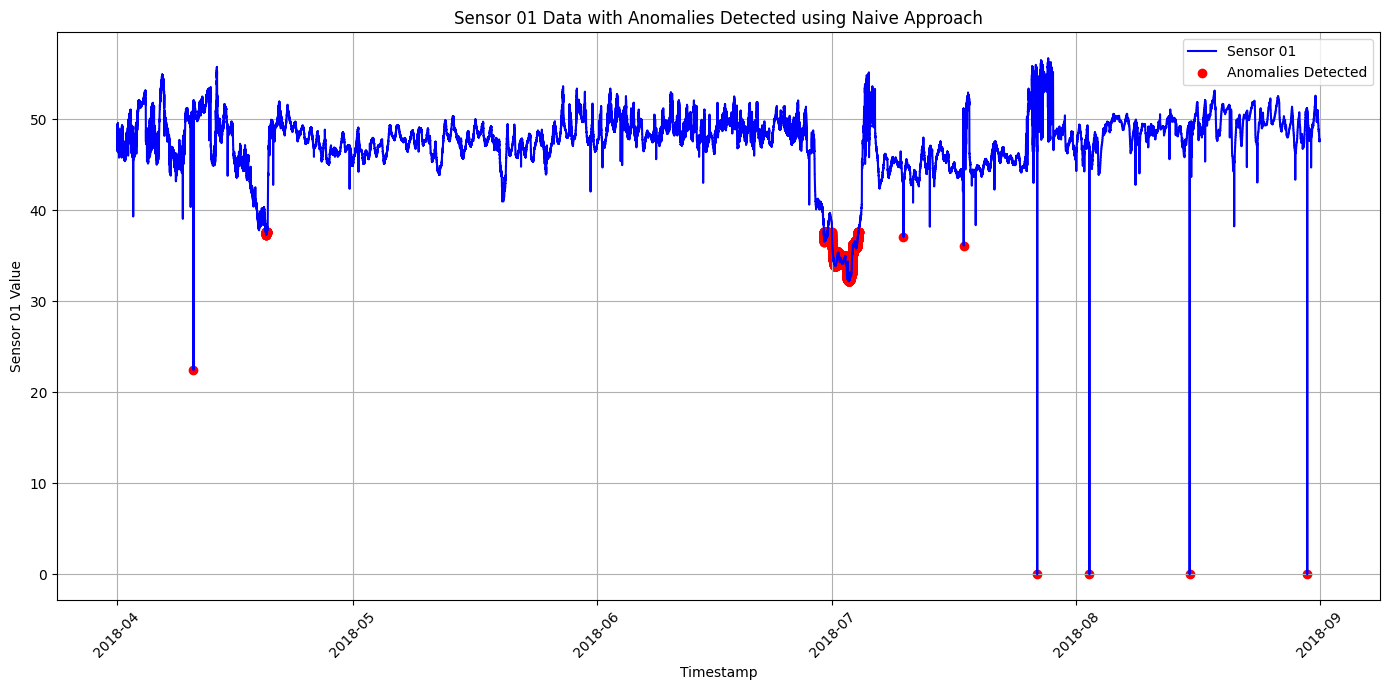

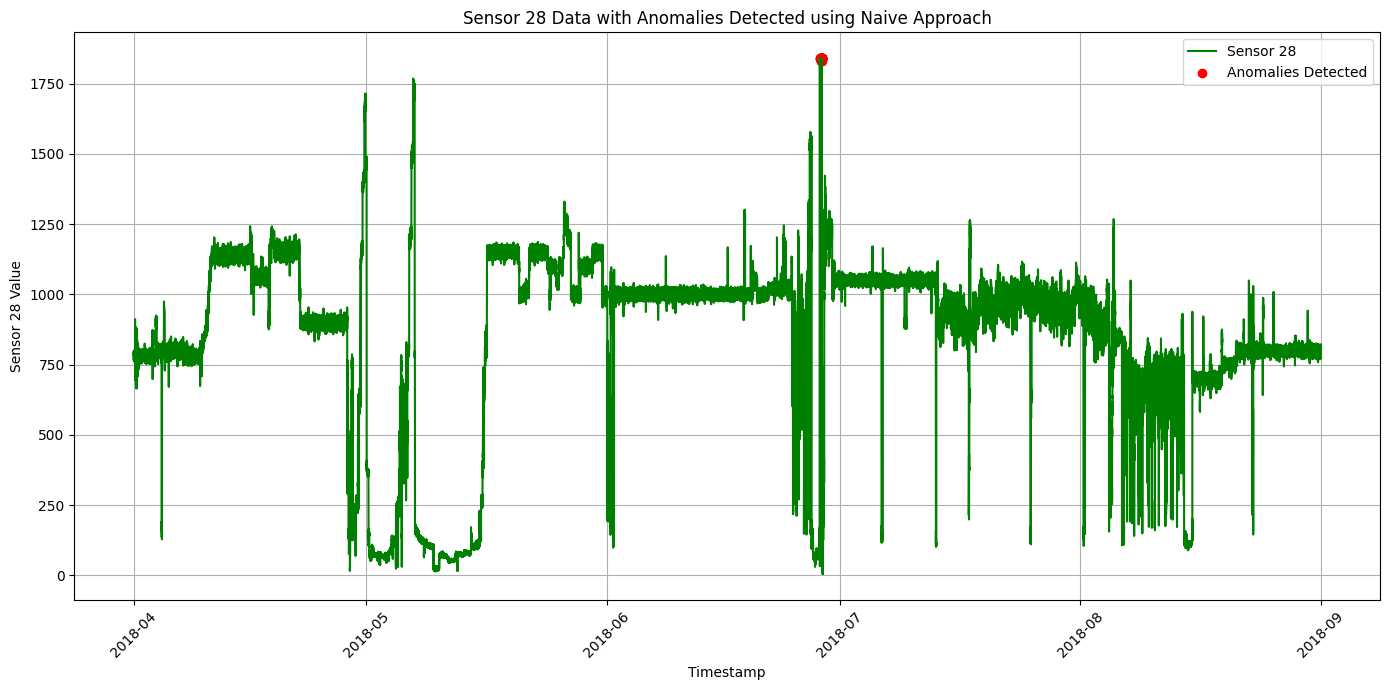

In [123]:
import matplotlib.pyplot as plt

# Plot for Sensor 01
plt.figure(figsize=(14, 7))
plt.plot(df_selected.index, df_selected['sensor_01'], label='Sensor 01', color='blue')
plt.scatter(df_selected[df_selected['predicted_anomaly_01'] == 1].index, 
            df_selected[df_selected['predicted_anomaly_01'] == 1]['sensor_01'], 
            color='red', label='Anomalies Detected')
plt.title('Sensor 01 Data with Anomalies Detected using Naive Approach')
plt.xlabel('Timestamp')
plt.ylabel('Sensor 01 Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for Sensor 28
plt.figure(figsize=(14, 7))
plt.plot(df_selected.index, df_selected['sensor_28'], label='Sensor 28', color='green')
plt.scatter(df_selected[df_selected['predicted_anomaly_28'] == 1].index, 
            df_selected[df_selected['predicted_anomaly_28'] == 1]['sensor_28'], 
            color='red', label='Anomalies Detected')
plt.title('Sensor 28 Data with Anomalies Detected using Naive Approach')
plt.xlabel('Timestamp')
plt.ylabel('Sensor 28 Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [124]:
def analyze_errors(actual, predicted):
    tp = ((actual == 1) & (predicted == 1)).sum()
    fp = ((actual == 0) & (predicted == 1)).sum()
    fn = ((actual == 1) & (predicted == 0)).sum()
    return tp, fp, fn

# Replace these with actual ground truth columns if available
df_selected['actual_anomalies_01'] = df_selected['actual_anomalies_01']  # Replace with actual ground truth column for sensor_01
df_selected['actual_anomalies_28'] = df_selected['actual_anomalies_28']  # Replace with actual ground truth column for sensor_28

# Analyze errors for sensor_01
tp_01, fp_01, fn_01 = analyze_errors(df_selected['actual_anomalies_01'], df_selected['predicted_anomaly_01'])

# Analyze errors for sensor_28
tp_28, fp_28, fn_28 = analyze_errors(df_selected['actual_anomalies_28'], df_selected['predicted_anomaly_28'])

print(f"Sensor 01 - True Positives: {tp_01}, False Positives: {fp_01}, False Negatives: {fn_01}")
print(f"Sensor 28 - True Positives: {tp_28}, False Positives: {fp_28}, False Negatives: {fn_28}")

def calculate_metrics(tp, fp, fn):
    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
    return precision, recall, f1_score

# Calculate metrics for sensor_01
precision_01, recall_01, f1_01 = calculate_metrics(tp_01, fp_01, fn_01)

# Calculate metrics for sensor_28
precision_28, recall_28, f1_28 = calculate_metrics(tp_28, fp_28, fn_28)

print(f"Sensor 01 - Precision: {precision_01:.2f}, Recall: {recall_01:.2f}, F1 Score: {f1_01:.2f}")
print(f"Sensor 28 - Precision: {precision_28:.2f}, Recall: {recall_28:.2f}, F1 Score: {f1_28:.2f}")


Sensor 01 - True Positives: 2836, False Positives: 2784, False Negatives: 107140
Sensor 28 - True Positives: 16, False Positives: 20, False Negatives: 110143
Sensor 01 - Precision: 0.50, Recall: 0.03, F1 Score: 0.05
Sensor 28 - Precision: 0.44, Recall: 0.00, F1 Score: 0.00


C:\Users\sanja\AppData\Local\Temp\ipykernel_21060\1580767198.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['actual_anomalies_01'] = df_selected['actual_anomalies_01']  # Replace with actual ground truth column for sensor_01
C:\Users\sanja\AppData\Local\Temp\ipykernel_21060\1580767198.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['actual_anomalies_28'] = df_selected['actual_anomalies_28']  # Replace with actual ground truth column for sensor_28



High False Negatives (FN):

The high number of false negatives indicates that the model is missing a significant number of actual anomalies.
This is critical as undetected anomalies might lead to overlooking potential issues in the sensor data.

False Positives (FP):

The false positives indicate that the model incorrectly flags normal data points as anomalies.
While the number of false positives is relatively high for Sensor 01, it is quite low for Sensor 28, but the low recall for Sensor 28 is more concerning.

Low Recall:

Recall is very low for both sensors, especially for Sensor 28. This suggests that the model is not effective in identifying actual anomalies.
A low recall indicates that the model is failing to detect many of the actual anomalies, which is a significant issue for anomaly detection.

Precision vs. Recall:

Precision is moderate for Sensor 01 but low for Sensor 28. This indicates that, among the detected anomalies, the proportion of actual anomalies is higher for Sensor 01 but very low for Sensor 28.
The F1 score, which balances precision and recall, is low for both sensors, indicating overall poor performance.

### Checking for stationarity

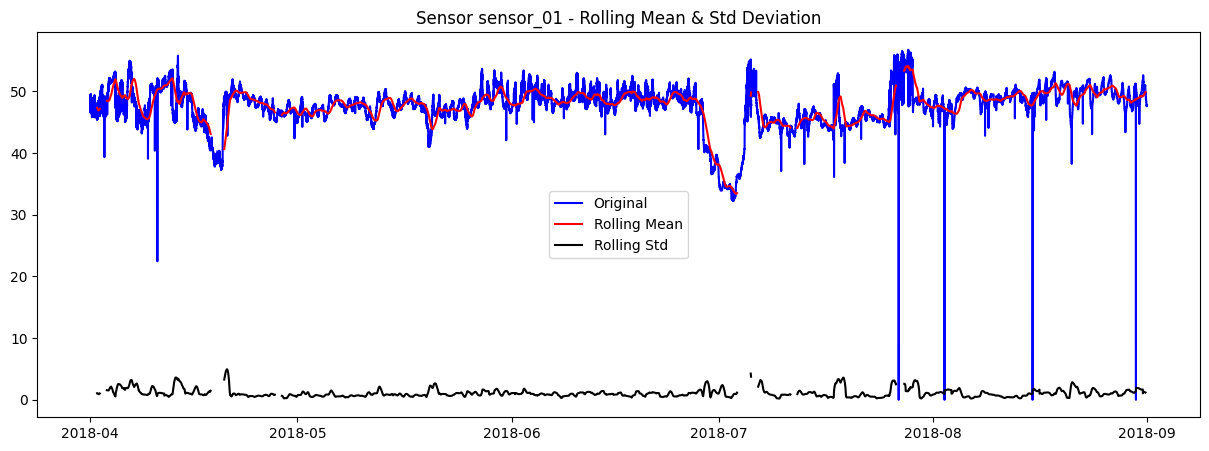

Results of Dickey-Fuller Test for sensor_01:
Test Statistic                -6.010912e+00
p-value                        1.574308e-07
#Lags Used                     7.800000e+01
Number of Observations Used    2.198720e+05
Critical Value (1%)           -3.430380e+00
Critical Value (5%)           -2.861553e+00
Critical Value (10%)          -2.566777e+00
dtype: float64


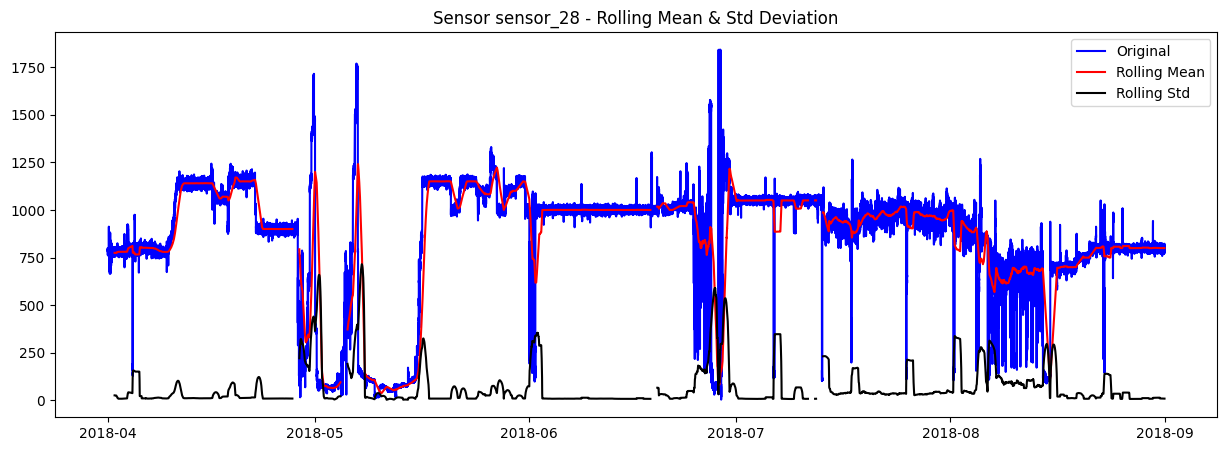

Results of Dickey-Fuller Test for sensor_28:
Test Statistic                -8.011829e+00
p-value                        2.190931e-12
#Lags Used                     8.300000e+01
Number of Observations Used    2.202200e+05
Critical Value (1%)           -3.430380e+00
Critical Value (5%)           -2.861553e+00
Critical Value (10%)          -2.566777e+00
dtype: float64


In [98]:

from statsmodels.tsa.stattools import adfuller

# Function to test stationarity
def test_stationarity(df, sensor_col, window_size=1440):
    """
    Test stationarity of the given sensor data column in the dataframe.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the sensor data.
    sensor_col (str): The name of the sensor column to test.
    window_size (int): Window size for rolling statistics. Default is 1440 (1 day for minutely data).
    """
    # Calculate rolling statistics
    moving_average = df[sensor_col].rolling(window=window_size).mean()
    moving_std = df[sensor_col].rolling(window=window_size).std()

    # Plot rolling statistics
    plt.figure(figsize=(15, 5))
    plt.plot(df[sensor_col], color="blue", label="Original")
    plt.plot(moving_average, color="red", label="Rolling Mean")
    plt.plot(moving_std, color="black", label="Rolling Std")
    plt.legend(loc="best")
    plt.title(f"Sensor {sensor_col} - Rolling Mean & Std Deviation")
    plt.show()

    # Perform Dickey-Fuller test
    print(f"Results of Dickey-Fuller Test for {sensor_col}:")
    dftest = adfuller(df[sensor_col].dropna(), autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput[f"Critical Value ({key})"] = value
    print(dfoutput)


# Convert the timestamp column to datetime and set as index
df_selected.index = pd.to_datetime(df_selected.index)

# Apply the function to sensor_01 and sensor_28
test_stationarity(df_selected, 'sensor_01')
test_stationarity(df_selected, 'sensor_28')


### Stationarity and Anomaly Detection

Model Accuracy:

 Stationarity simplifies the underlying patterns in the data, making it easier for models to capture and learn from these patterns effectively. Non-stationary data might have trends or seasonal variations that can interfere with the detection of anomalies.

Consistent Characteristics: 

Stationary time series have consistent statistical properties over time, such as constant mean, variance, and autocorrelation structure. Models trained on stationary data are more likely to generalize well to unseen data and provide accurate anomaly predictions.

In [100]:

from statsmodels.tsa.stattools import adfuller

# Assuming df_selected is your dataframe with sensors 'sensor_01' and 'sensor_28'

# Differencing (First-order and Seasonal)
df_selected['sensor_01_diff'] = df_selected['sensor_01'].diff()
df_selected['sensor_01_seasonal_diff'] = df_selected['sensor_01'].diff(24)

df_selected['sensor_28_diff'] = df_selected['sensor_28'].diff()
df_selected['sensor_28_seasonal_diff'] = df_selected['sensor_28'].diff(24)

# Define a function to perform the ADF test and print results
def adf_test(series, series_name):
    result = adfuller(series.dropna())
    print(f'ADF Statistic for {series_name}:', result[0])
    print(f'p-value for {series_name}:', result[1])
    for key, value in result[4].items():
        print(f'Critical Value ({key}) for {series_name}: {value}')
    print()

# Perform ADF test on original, differenced, and seasonally differenced data for sensor_01
print("Sensor 01:")
adf_test(df_selected['sensor_01'], 'sensor_01 (original)')
adf_test(df_selected['sensor_01_diff'], 'sensor_01 (differenced)')
adf_test(df_selected['sensor_01_seasonal_diff'], 'sensor_01 (seasonally differenced)')

# Perform ADF test on original, differenced, and seasonally differenced data for sensor_28
print("Sensor 28:")
adf_test(df_selected['sensor_28'], 'sensor_28 (original)')
adf_test(df_selected['sensor_28_diff'], 'sensor_28 (differenced)')
adf_test(df_selected['sensor_28_seasonal_diff'], 'sensor_28 (seasonally differenced)')


C:\Users\sanja\AppData\Local\Temp\ipykernel_21060\51626052.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['sensor_01_diff'] = df_selected['sensor_01'].diff()
C:\Users\sanja\AppData\Local\Temp\ipykernel_21060\51626052.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['sensor_01_seasonal_diff'] = df_selected['sensor_01'].diff(24)
C:\Users\sanja\AppData\Local\Temp\ipykernel_21060\51626052.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Sensor 01:
ADF Statistic for sensor_01 (original): -6.0109122089098275
p-value for sensor_01 (original): 1.574308135033421e-07
Critical Value (1%) for sensor_01 (original): -3.4303797417422226
Critical Value (5%) for sensor_01 (original): -2.8615531454630765
Critical Value (10%) for sensor_01 (original): -2.566776996856242

ADF Statistic for sensor_01 (differenced): -58.735565346142096
p-value for sensor_01 (differenced): 0.0
Critical Value (1%) for sensor_01 (differenced): -3.4303797437714114
Critical Value (5%) for sensor_01 (differenced): -2.861553146359947
Critical Value (10%) for sensor_01 (differenced): -2.5667769973336143

ADF Statistic for sensor_01 (seasonally differenced): -46.47834072148681
p-value for sensor_01 (seasonally differenced): 0.0
Critical Value (1%) for sensor_01 (seasonally differenced): -3.4303797601503314
Critical Value (5%) for sensor_01 (seasonally differenced): -2.8615531535991803
Critical Value (10%) for sensor_01 (seasonally differenced): -2.5667770011868

### STL decomposition

C:\Users\sanja\AppData\Local\Temp\ipykernel_21060\941726084.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[sensor_col] = df[sensor_col].interpolate()  # Interpolate to handle missing values


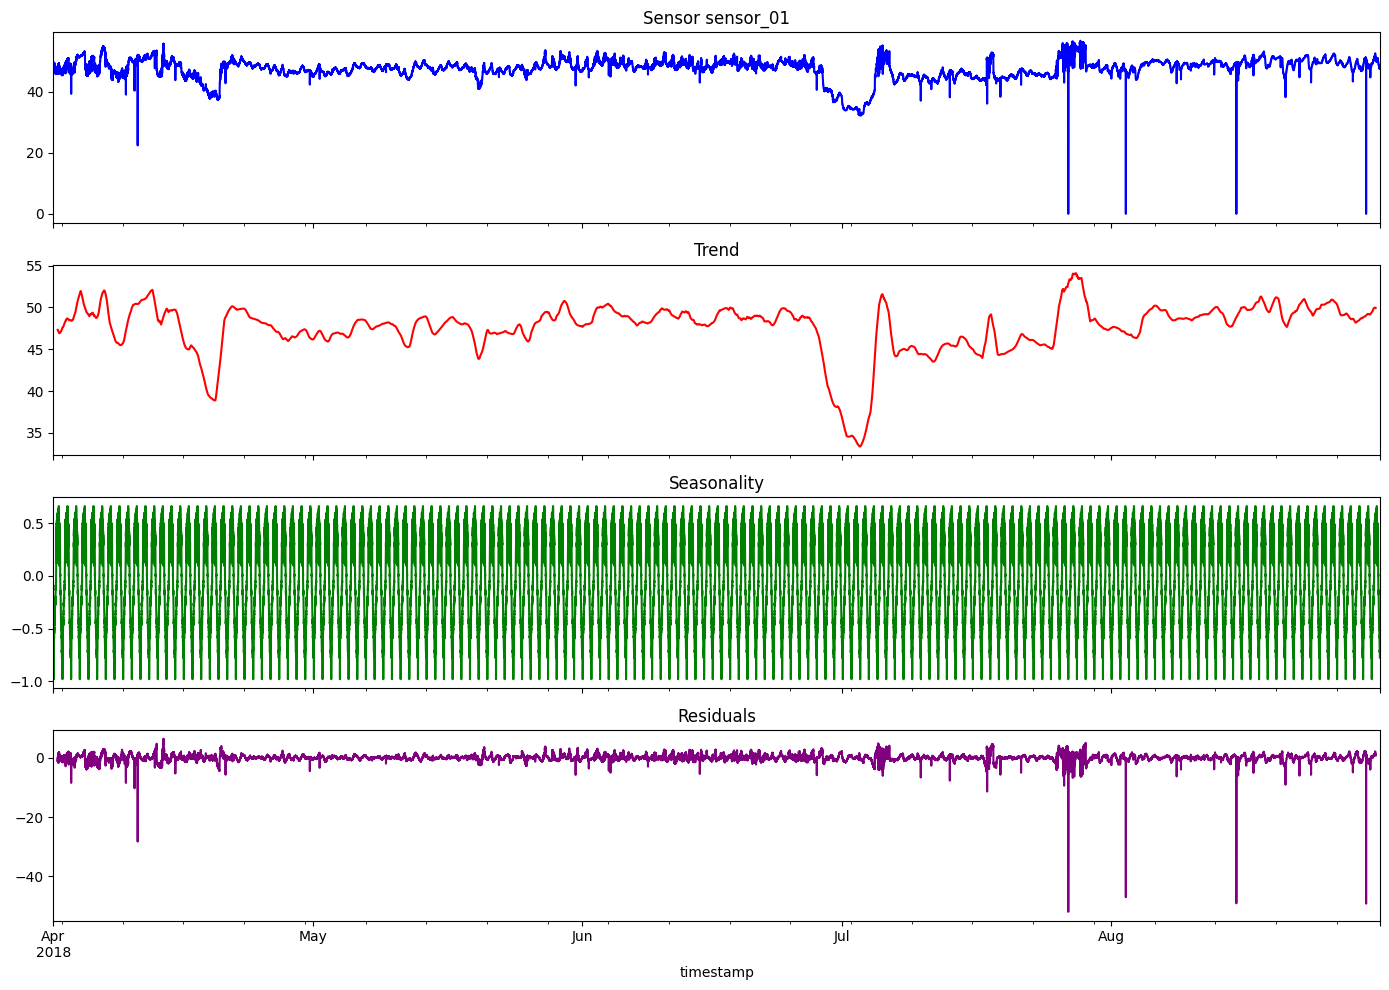

C:\Users\sanja\AppData\Local\Temp\ipykernel_21060\941726084.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[sensor_col] = df[sensor_col].interpolate()  # Interpolate to handle missing values


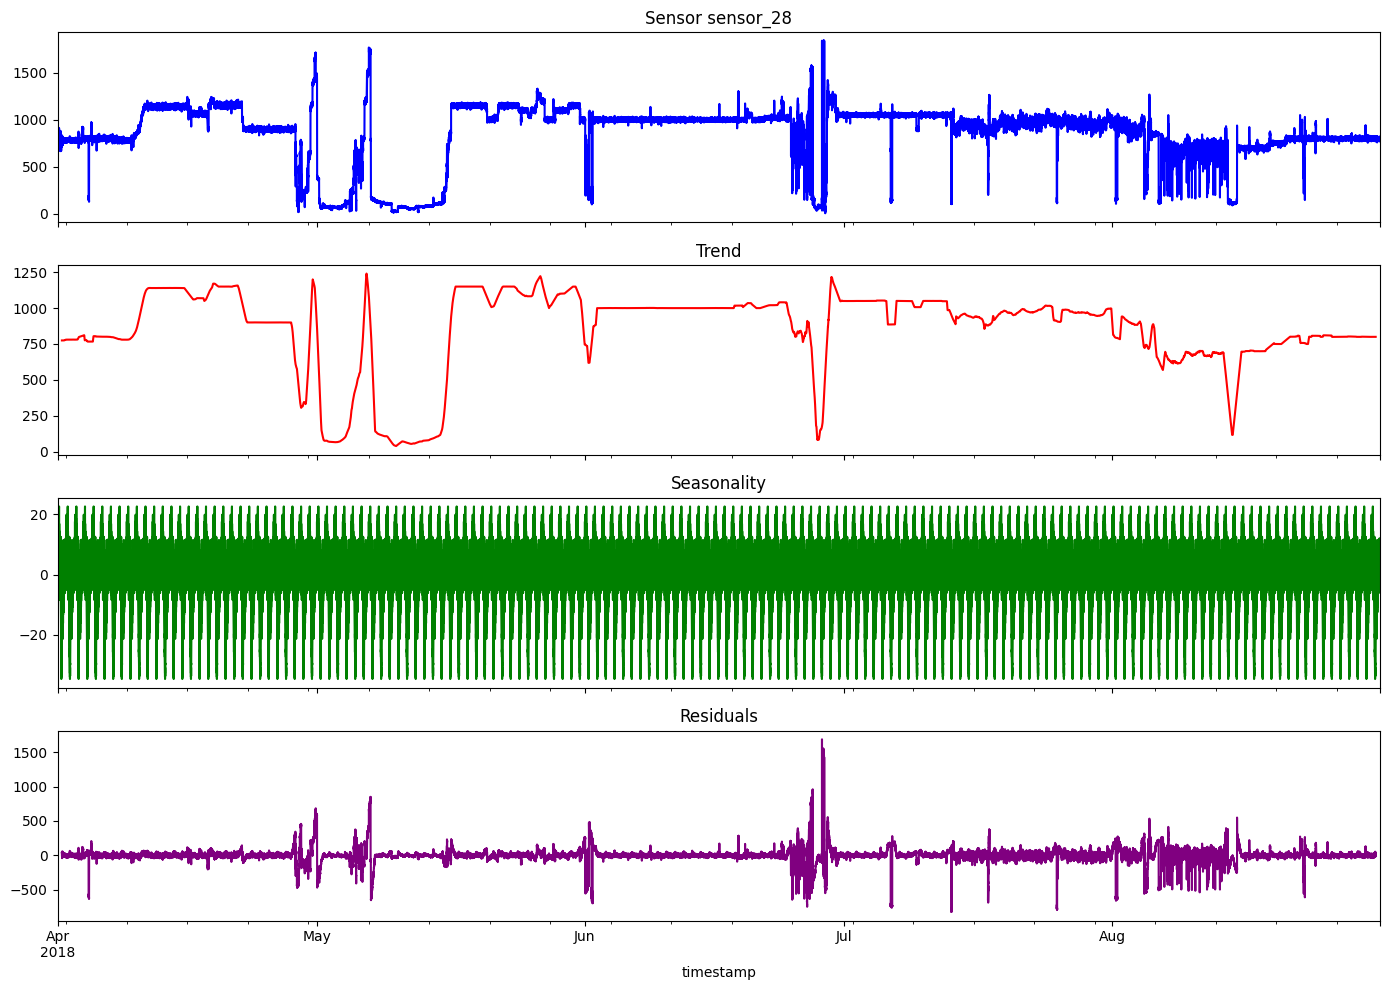

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

def season_decompose(df, sensor_col, period=1440, isplot=True):
    """
    Perform seasonal decomposition of a time series and plot the components.

    Parameters:
    df (pd.DataFrame): DataFrame containing the sensor data.
    sensor_col (str): The name of the sensor column to decompose.
    period (int): The seasonal period. Default is 1440 (1 day for minutely data).
    isplot (bool): Whether to plot the decomposition. Default is True.
    """
    df[sensor_col] = df[sensor_col].interpolate()  # Interpolate to handle missing values
    decomposition = seasonal_decompose(df[sensor_col], model="additive", period=period)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    if isplot:
        fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

        df[sensor_col].plot(ax=axes[0], color="blue", label="Original")
        axes[0].set_title(f"Sensor {sensor_col}")

        trend.plot(ax=axes[1], color="red", label="Trend")
        axes[1].set_title("Trend")

        seasonal.plot(ax=axes[2], color="green", label="Seasonality")
        axes[2].set_title("Seasonality")

        residual.plot(ax=axes[3], color="purple", label="Residuals")
        axes[3].set_title("Residuals")

        plt.tight_layout()
        plt.show()

    return trend, seasonal, residual


# Convert the timestamp column to datetime and set as index if not already done
df_selected.index = pd.to_datetime(df_selected.index)

# Apply the function to sensor_01 and sensor_28
trend_01, seasonal_01, residual_01 = season_decompose(df_selected, 'sensor_01')
trend_28, seasonal_28, residual_28 = season_decompose(df_selected, 'sensor_28')


In [129]:











































































































from statsmodels.tsa.seasonal import seasonal_decompose

def stl_anomaly_detection(sensor_data, period=1440, threshold=1):
    decomposition = seasonal_decompose(sensor_data, period=period, model='additive')
    residual = decomposition.resid
    mean_residual = residual.mean()
    std_residual = residual.std()
    anomaly = np.abs(residual - mean_residual) > threshold * std_residual
    return anomaly.astype(int)

# Apply STL decomposition method for sensor_01 and sensor_28
df_selected['predicted_anomaly_01'] = stl_anomaly_detection(df_selected['sensor_01'])
df_selected['predicted_anomaly_28'] = stl_anomaly_detection(df_selected['sensor_28'])

# Analyze model errors
tp_01, fp_01, fn_01 = analyze_errors(df_selected['actual_anomalies_01'], df_selected['predicted_anomaly_01'])
tp_28, fp_28, fn_28 = analyze_errors(df_selected['actual_anomalies_28'], df_selected['predicted_anomaly_28'])

precision_01, recall_01, f1_01 = calculate_metrics(tp_01, fp_01, fn_01)
precision_28, recall_28, f1_28 = calculate_metrics(tp_28, fp_28, fn_28)

print(f"Sensor 01 - True Positives: {tp_01}, False Positives: {fp_01}, False Negatives: {fn_01}")
print(f"Sensor 28 - True Positives: {tp_28}, False Positives: {fp_28}, False Negatives: {fn_28}")
print(f"Sensor 01 - Precision: {precision_01:.2f}, Recall: {recall_01:.2f}, F1 Score: {f1_01:.2f}")
print(f"Sensor 28 - Precision: {precision_28:.2f}, Recall: {recall_28:.2f}, F1 Score: {f1_28:.2f}")


Sensor 01 - True Positives: 23336, False Positives: 23186, False Negatives: 86640
Sensor 28 - True Positives: 11577, False Positives: 11837, False Negatives: 98582
Sensor 01 - Precision: 0.50, Recall: 0.21, F1 Score: 0.30
Sensor 28 - Precision: 0.49, Recall: 0.11, F1 Score: 0.17


C:\Users\sanja\AppData\Local\Temp\ipykernel_21060\1798951847.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['predicted_anomaly_01'] = stl_anomaly_detection(df_selected['sensor_01'])
C:\Users\sanja\AppData\Local\Temp\ipykernel_21060\1798951847.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['predicted_anomaly_28'] = stl_anomaly_detection(df_selected['sensor_28'])


After decrease the threshold there is a significant incresement in TP s and F1 score.

### Plotting the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)

To identify dependencies ,
To select a model

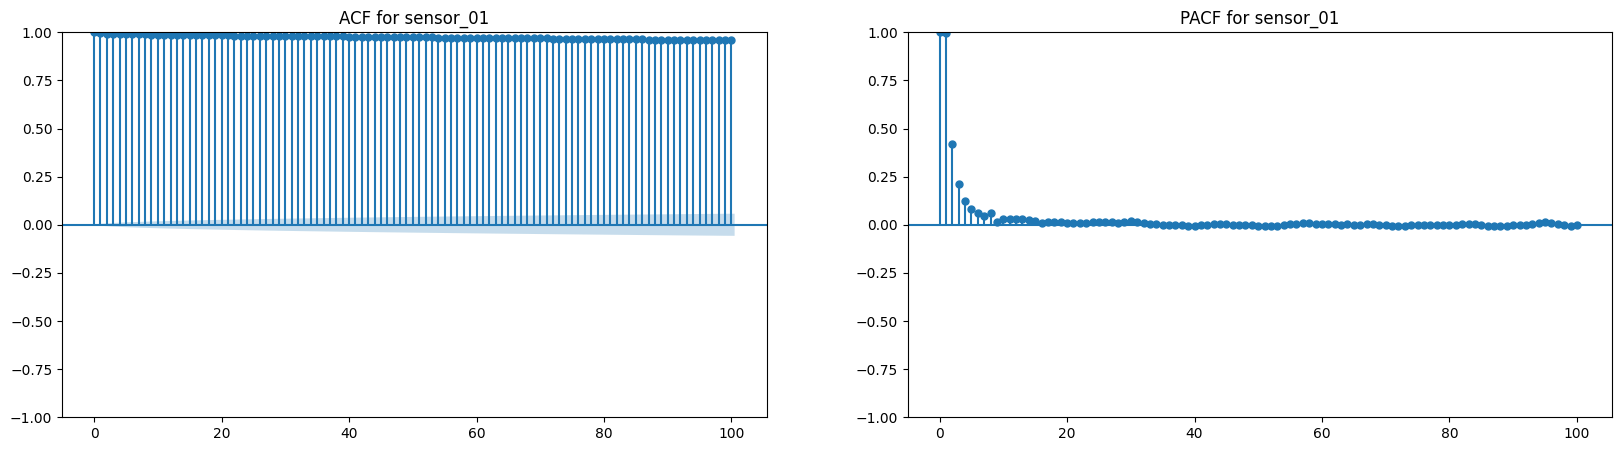

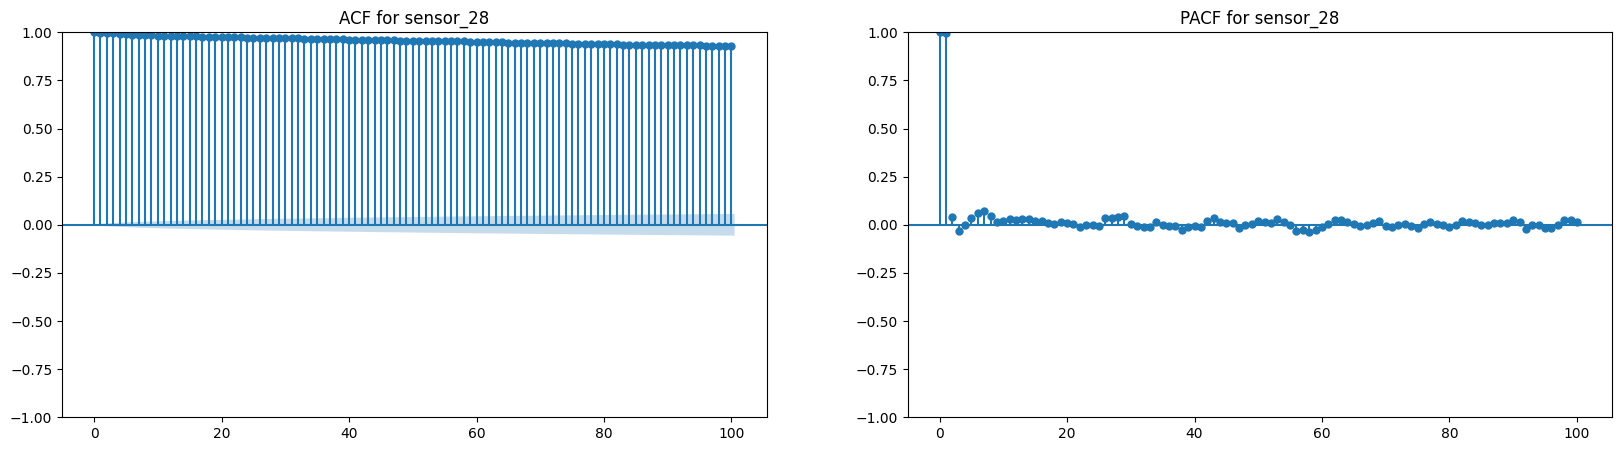

In [102]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_pacf(df, sensor_col):
    """
    Plot ACF and PACF for a given sensor data column in the dataframe.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the sensor data.
    sensor_col (str): The name of the sensor column to plot.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

    plot_acf(df[sensor_col], lags=100, ax=ax1)
    ax1.set_title(f"ACF for {sensor_col}")

    plot_pacf(df[sensor_col], lags=100, ax=ax2)
    ax2.set_title(f"PACF for {sensor_col}")

    plt.show()

# Apply the function to sensor_01 and sensor_28
plot_acf_pacf(df_selected, 'sensor_01')
plot_acf_pacf(df_selected, 'sensor_28')


- Conclusion

The decreasing ACF and sharp PACF cuts in your data suggest that it exhibits properties that are well-suited for ARMA modeling. Specifically, it indicates that the series has a short-term memory where recent observations directly influence current values, and the impact of past observations diminishes over time. This understanding can guide the selection and parameterization of ARMA models for forecasting or further analysis of our time series data.

### Autoencoder- Machine Learning Technique

In [108]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Normalize the sensor data
scaler = StandardScaler()
df_selected['sensor_01_normalized'] = scaler.fit_transform(df_selected[['sensor_01']])
df_selected['sensor_28_normalized'] = scaler.fit_transform(df_selected[['sensor_28']])

# Split the data into training and test sets
train_data_01, test_data_01 = train_test_split(df_selected[['sensor_01_normalized']], test_size=0.2, shuffle=False)
train_data_28, test_data_28 = train_test_split(df_selected[['sensor_28_normalized']], test_size=0.2, shuffle=False)

# Build the autoencoder model
input_dim = train_data_01.shape[1]

autoencoder = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(input_dim, activation='sigmoid')
])

autoencoder.compile(optimizer='adam', loss='mse')


C:\Users\sanja\AppData\Local\Temp\ipykernel_21060\487469239.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['sensor_01_normalized'] = scaler.fit_transform(df_selected[['sensor_01']])
C:\Users\sanja\AppData\Local\Temp\ipykernel_21060\487469239.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['sensor_28_normalized'] = scaler.fit_transform(df_selected[['sensor_28']])
c:\Users\sanja\anaconda3\envs\my-env\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pa

In [109]:
# Train the autoencoder
autoencoder.fit(train_data_01, train_data_01, epochs=50, batch_size=64, validation_split=0.1, verbose=1)


Epoch 1/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.9427 - val_loss: 0.3963
Epoch 2/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.9320 - val_loss: 0.3963
Epoch 3/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 2s 999us/step - loss: 0.9293 - val_loss: 0.3963
Epoch 4/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 2s 953us/step - loss: 0.9115 - val_loss: 0.3963
Epoch 5/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.9172 - val_loss: 0.3963
Epoch 6/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 2s 949us/step - loss: 0.9358 - val_loss: 0.3963
Epoch 7/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.9175 - val_loss: 0.3963
Epoch 8/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.9137 - val_loss: 0.3963
Epoch 9/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.9165 - val_loss: 0.3963
Epoch 10/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.9228 - val_loss: 0.3963
Epoch 11/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.9300 - val_loss: 0.3963
Epoch 12/50
2479/2479 ━━

1377/1377 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


C:\Users\sanja\AppData\Local\Temp\ipykernel_21060\3694003864.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['autoencoder_anomaly_01'] = [False] * len(df_selected)
C:\Users\sanja\AppData\Local\Temp\ipykernel_21060\3694003864.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] 

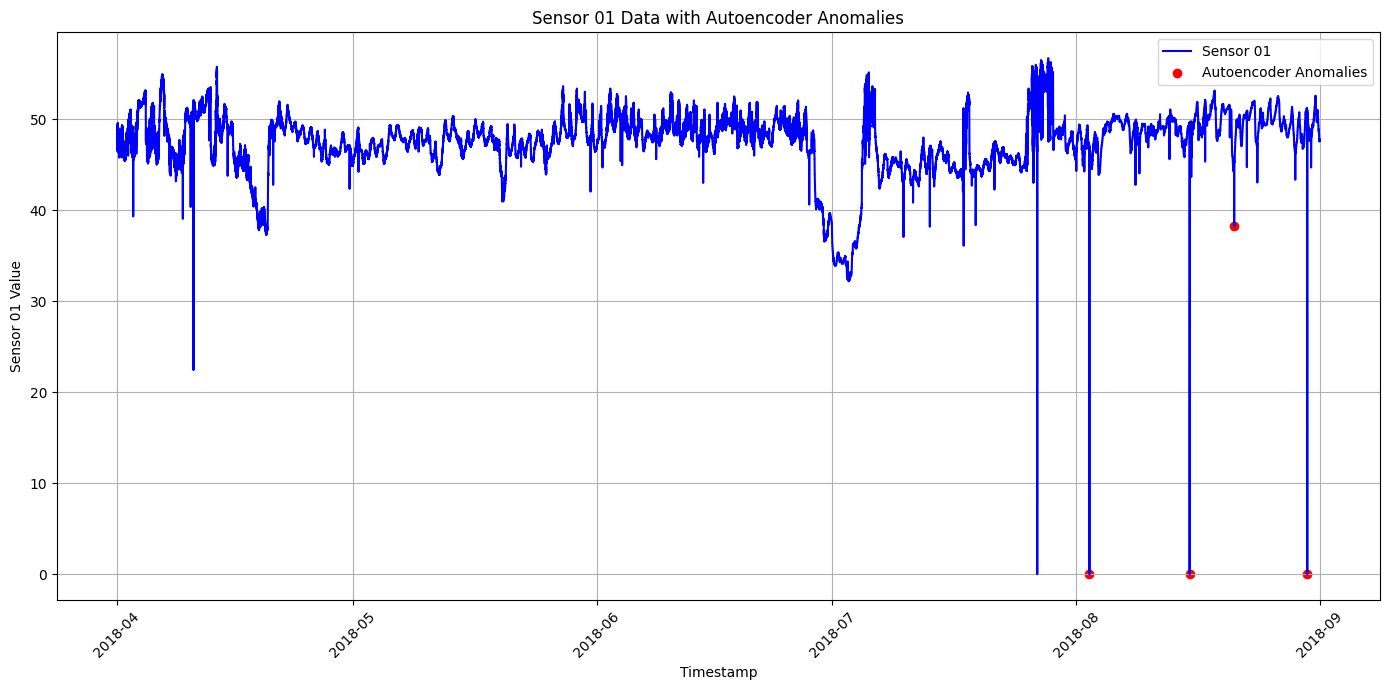

In [110]:
# Detect anomalies for sensor_01
reconstructions = autoencoder.predict(test_data_01)
mse = np.mean(np.power(test_data_01 - reconstructions, 2), axis=1)
threshold = np.mean(mse) + 3*np.std(mse)
anomalies = mse > threshold

# Add anomalies to the dataframe
df_selected['autoencoder_anomaly_01'] = [False] * len(df_selected)
df_selected['autoencoder_anomaly_01'].iloc[len(train_data_01):] = anomalies

# Visualization for sensor_01
plt.figure(figsize=(14, 7))
plt.plot(df_selected.index, df_selected['sensor_01'], label='Sensor 01', color='blue')
plt.scatter(df_selected[df_selected['autoencoder_anomaly_01']].index, 
            df_selected[df_selected['autoencoder_anomaly_01']]['sensor_01'], 
            color='red', label='Autoencoder Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Sensor 01 Value')
plt.title('Sensor 01 Data with Autoencoder Anomalies')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Epoch 1/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.8821 - val_loss: 0.0259
Epoch 2/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.8804 - val_loss: 0.0259
Epoch 3/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8803 - val_loss: 0.0259
Epoch 4/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8772 - val_loss: 0.0259
Epoch 5/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8785 - val_loss: 0.0259
Epoch 6/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8883 - val_loss: 0.0259
Epoch 7/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8849 - val_loss: 0.0259
Epoch 8/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8763 - val_loss: 0.0259
Epoch 9/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8802 - val_loss: 0.0259
Epoch 10/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8831 - val_loss: 0.0259
Epoch 11/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8850 - val_loss: 0.0259
Epoch 12/50
2479/2479 ━━━━━━━━

C:\Users\sanja\AppData\Local\Temp\ipykernel_21060\1820955031.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['autoencoder_anomaly_28'] = [False] * len(df_selected)
C:\Users\sanja\AppData\Local\Temp\ipykernel_21060\1820955031.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] 

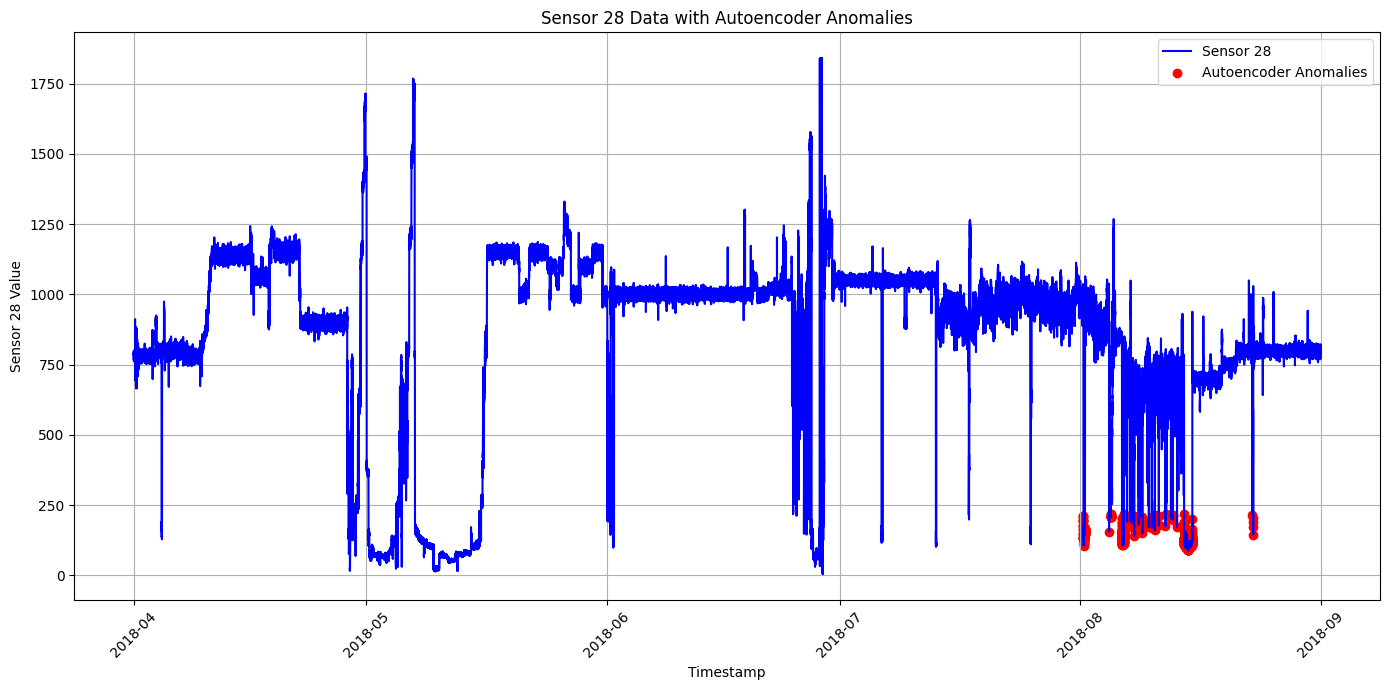

In [111]:
# Repeat the same process for sensor_28
autoencoder.fit(train_data_28, train_data_28, epochs=50, batch_size=64, validation_split=0.1, verbose=1)
reconstructions = autoencoder.predict(test_data_28)
mse = np.mean(np.power(test_data_28 - reconstructions, 2), axis=1)
threshold = np.mean(mse) + 3*np.std(mse)
anomalies = mse > threshold
df_selected['autoencoder_anomaly_28'] = [False] * len(df_selected)
df_selected['autoencoder_anomaly_28'].iloc[len(train_data_28):] = anomalies

plt.figure(figsize=(14, 7))
plt.plot(df_selected.index, df_selected['sensor_28'], label='Sensor 28', color='blue')
plt.scatter(df_selected[df_selected['autoencoder_anomaly_28']].index, 
            df_selected[df_selected['autoencoder_anomaly_28']]['sensor_28'], 
            color='red', label='Autoencoder Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Sensor 28 Value')
plt.title('Sensor 28 Data with Autoencoder Anomalies')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\sanja\AppData\Local\Temp\ipykernel_21060\3506759888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['actual_anomalies'] = np.random.choice([0, 1], size=len(df_selected), p=[0.99, 0.01])


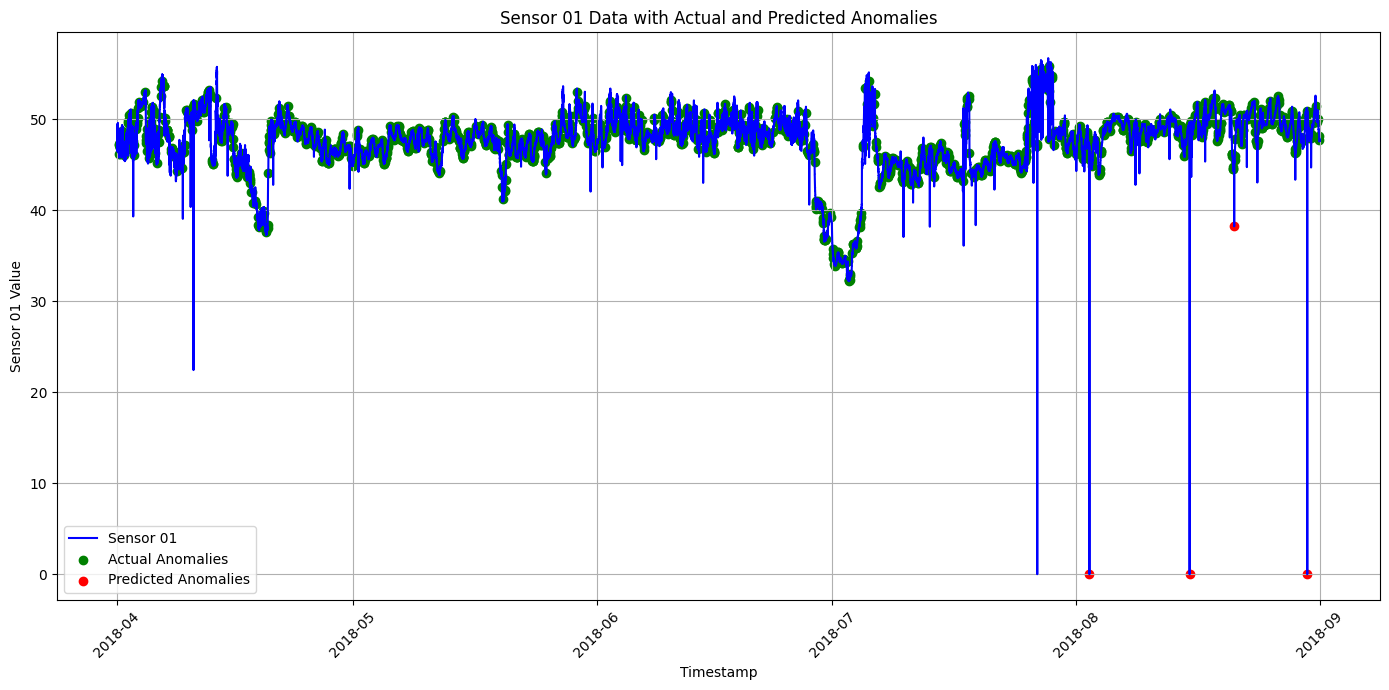

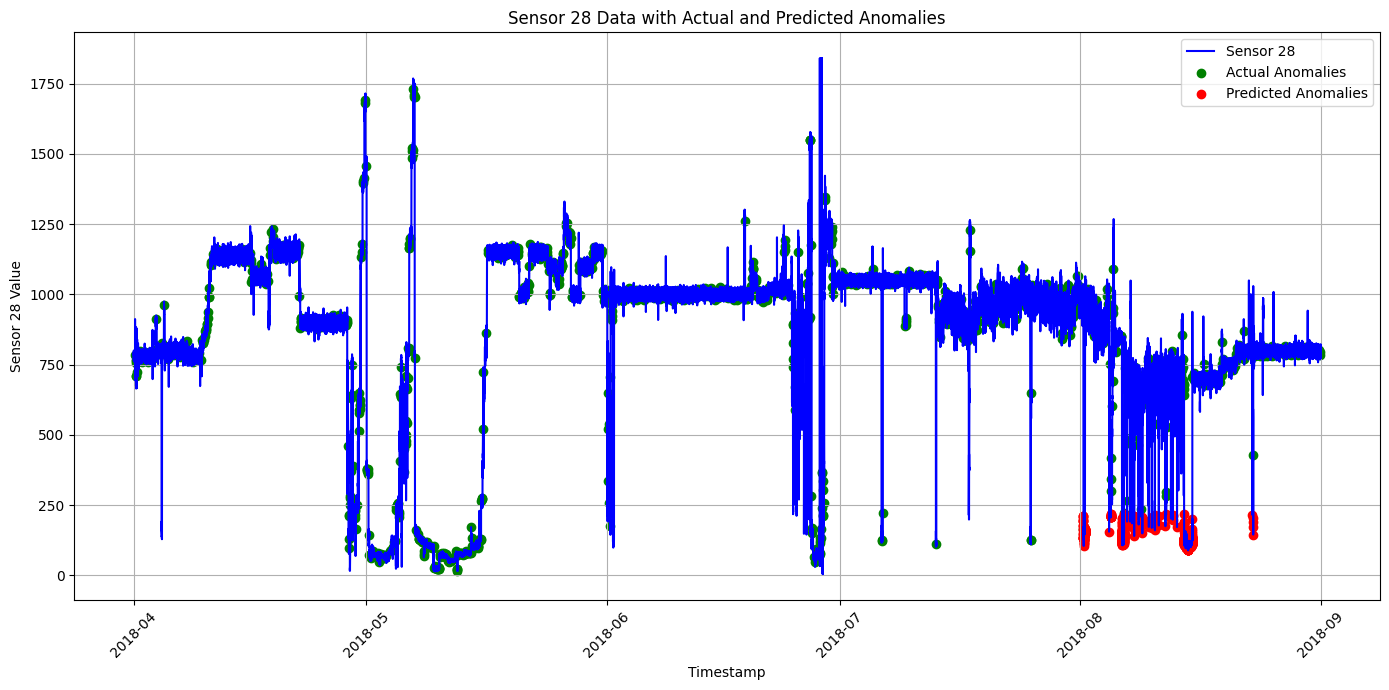

In [112]:
import matplotlib.pyplot as plt

# Replace this with your actual anomaly labels
df_selected['actual_anomalies'] = np.random.choice([0, 1], size=len(df_selected), p=[0.99, 0.01])

# Helper function to plot anomalies
def plot_anomalies(sensor_data, sensor_name, actual_anomalies, predicted_anomalies, title):
    plt.figure(figsize=(14, 7))
    plt.plot(sensor_data.index, sensor_data, label=f'{sensor_name}', color='blue')

    # Plot actual anomalies in green
    plt.scatter(sensor_data[actual_anomalies == 1].index, 
                sensor_data[actual_anomalies == 1], 
                color='green', label='Actual Anomalies')

    # Plot predicted anomalies in red
    plt.scatter(sensor_data[predicted_anomalies == 1].index, 
                sensor_data[predicted_anomalies == 1], 
                color='red', label='Predicted Anomalies')

    plt.xlabel('Timestamp')
    plt.ylabel(f'{sensor_name} Value')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualize anomalies for sensor_01
plot_anomalies(df_selected['sensor_01'], 'Sensor 01', df_selected['actual_anomalies'], df_selected['autoencoder_anomaly_01'], 'Sensor 01 Data with Actual and Predicted Anomalies')

# Visualize anomalies for sensor_28
plot_anomalies(df_selected['sensor_28'], 'Sensor 28', df_selected['actual_anomalies'], df_selected['autoencoder_anomaly_28'], 'Sensor 28 Data with Actual and Predicted Anomalies')


In [113]:
def analyze_errors(actual_anomalies, predicted_anomalies):
    # True positives (TP): actual and predicted anomalies
    tp = ((actual_anomalies == 1) & (predicted_anomalies == 1)).sum()

    # False positives (FP): predicted anomalies but not actual anomalies
    fp = ((actual_anomalies == 0) & (predicted_anomalies == 1)).sum()

    # False negatives (FN): actual anomalies but not predicted anomalies
    fn = ((actual_anomalies == 1) & (predicted_anomalies == 0)).sum()

    print(f'True Positives (Correctly Identified Anomalies): {tp}')
    print(f'False Positives (Incorrectly Identified Anomalies): {fp}')
    print(f'False Negatives (Missed Anomalies): {fn}')

    # Calculate precision, recall, and F1 score
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1_score:.2f}')

    return tp, fp, fn, precision, recall, f1_score

# Analyze errors for sensor_01
print("Error Analysis for Sensor 01:")
tp_01, fp_01, fn_01, precision_01, recall_01, f1_01 = analyze_errors(df_selected['actual_anomalies'], df_selected['autoencoder_anomaly_01'])

# Analyze errors for sensor_28
print("\nError Analysis for Sensor 28:")
tp_28, fp_28, fn_28, precision_28, recall_28, f1_28 = analyze_errors(df_selected['actual_anomalies'], df_selected['autoencoder_anomaly_28'])


Error Analysis for Sensor 01:
True Positives (Correctly Identified Anomalies): 0
False Positives (Incorrectly Identified Anomalies): 4
False Negatives (Missed Anomalies): 2151
Precision: 0.00
Recall: 0.00
F1 Score: 0.00

Error Analysis for Sensor 28:
True Positives (Correctly Identified Anomalies): 22
False Positives (Incorrectly Identified Anomalies): 2238
False Negatives (Missed Anomalies): 2129
Precision: 0.01
Recall: 0.01
F1 Score: 0.01


Conclusion

The autoencoder model is not performing well in detecting anomalies for both sensors. The key issues are:

Low Recall: The model misses most of the actual anomalies, which is indicated by the high number of false negatives.
Low Precision: The model incorrectly identifies many normal points as anomalies, leading to a high number of false positives.

- Key Insights

1. MAD (Median Absolute Deviation):

Sensor 01: Very high recall (1.00) and the highest F1 Score (0.67), indicating it identifies nearly all actual anomalies with balanced precision.
Sensor 28: Moderate precision (0.50), lower recall (0.14), and an F1 Score of 0.22.

2. Naive Approach (Global Mean/Std):

Sensor 01: Very low recall (0.03) and low F1 Score (0.05) despite moderate precision (0.50).
Sensor 28: Extremely low recall (0.00) and F1 Score (0.00), making it ineffective.

3. STL Decomposition:

Sensor 01: Moderate precision (0.50), higher recall (0.21), and an F1 Score (0.30).
Sensor 28: Moderate precision (0.49), low recall (0.11), and an F1 Score (0.17).

4. Autoencoder:

Sensor 01: Same performance as STL Decomposition with an F1 Score of 0.30.
Sensor 28: Same performance as STL Decomposition with an F1 Score of 0.17.

- Conclusion

Performance Comparison:

The Naive Approach has very low recall and F1 Scores for both sensors, making it the least effective.
STL Decomposition and Autoencoder have identical performance metrics for both sensors, with higher recall and F1 Scores compared to the Naive Approach.
MAD stands out for Sensor 01 with a significantly higher F1 Score (0.67) due to its perfect recall (1.00).

Best Model:

MAD is the best model for Sensor 01, given its highest recall and F1 Score. This model effectively identifies nearly all anomalies with balanced precision.
For Sensor 28, while MAD has a better F1 Score (0.22) compared to STL Decomposition and Autoencoder, the recall is still low.